<span style="font-size: 14pt">EREVAN, May-June 2017</span>

<span style="font-size: 16pt"> Practice day #1: ES models </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Info</h1> 
This is first laboratory task for the course TSA.
The Lab is desinged to impove skills of tuning parameters of ES models and get experience of coding of simple Regression Models.

The Lab should take about 5-6 hours to be completed.

<h1 align="center">Important Info</h1> 
- <span style="font-size: 14pt;"> You must send your solution to the email </span> <span style="color:red; font-size: 12pt;">alexromsput@gmail.com, </span>
- The theme of your message must be <span style="color:red; font-size: 12pt;"> TSA-Erevan-2017-[Your Surname] </span>, for exmaple -- TSA-Erevan-2017-Romanenko,
- The file in attachment of the letter must be named as <span style="color:red; font-size: 12pt;"> [Surname]-[Group]-Lab1.ipnb</span>, for example -- Romanenko-Evening-Lab1.ipnb,
  
<span style="color:red; font-size: 14pt;"> DEADLINE: 7 June 2017 23:59:59 </span>


<h1 align="center">1. Realization of ES models(50%)</h1>
Solve the task fo Prcatice Day 1 and put you solution (that means cells and outputs) below

<h1 align="center">1. Reading data (10%)</h1>

  * Download data for following data sets
     - 1) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv </span>(1 TS of monthly wage in Russia)
     - 2) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep36.csv</span> (105 TS of goods sales in shop #36 of one real Retail Net, each TS correspond to an item in shop )
     - 3) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep42.csv</span> (105 TS of goods sales in shop #42 of one real Retail Net, each TS correspond to an item in shop)
     - 4) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep6.csv </span>(110 TS of goods sales in shop #6 of one real Retail Net, each TS correspond to an item in shop)
 
 All data you can find by <a href='https://1drv.ms/f/s!AqGgzb5T4tvShZ1-xS0s6FhP5x-05g'>link</a> 
 
 
 * For each data set: 
      - 1) learn it's structure in csv-file and read it into Pandas data frame (be careful with parsing data)
      - 2) plot time series (for data sets with a lot of TS you need to plot integral sales of all items in shop)
      - 3) answer the questions: is there seasonlaity, trend, changes in level in TS? If there is seasonality then define period of seasonality. 

In [512]:
# start with this code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import qualityRMSE, qualityMedianAE, qualityMACAPE, qualityMAPE
from utils import SES_AP
from datetime import datetime, timedelta
import math
import seaborn as sns
import warnings as w
import itertools
sns.set_style("white")

%matplotlib inline


ts_wage = pd.read_csv('./data/monthly-wage.csv', sep=';', decimal='.', index_col='Month', parse_dates=True, dayfirst=True)
ts_dep36 = pd.read_csv('./data/TS_dep36.csv', sep=';', decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)
ts_dep42 = pd.read_csv('./data/TS_dep42.csv', sep=';', decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)
ts_dep6 = pd.read_csv('./data/TS_dep6.csv', sep=';', decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)

#### Time series from Wage data:

In [3]:
ts_wage.head(5)

Real wage
Month                
1993-01-01     100.00
1993-02-01      99.04
1993-03-01     101.77
1993-04-01     110.05
1993-05-01     115.47

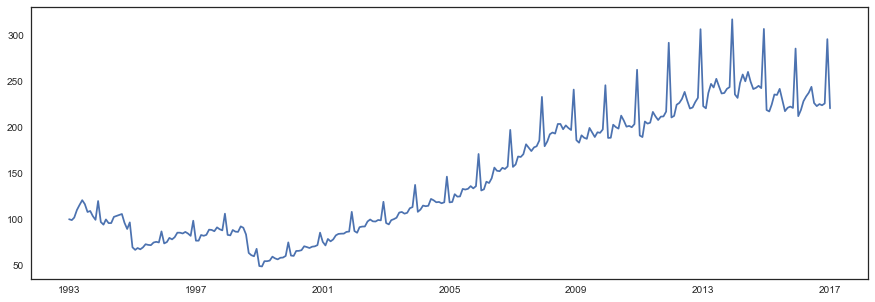

In [4]:
plt.figure(figsize=(15,5))
plt.plot(ts_wage)


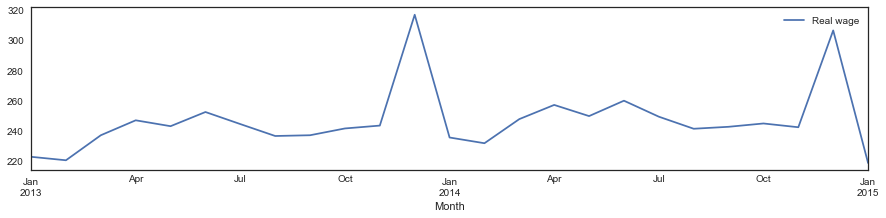

In [5]:
ts_wage['2013-01-01': '2015-01-01'].plot(figsize=(15,3))


Seems there is a monthly seasonality!

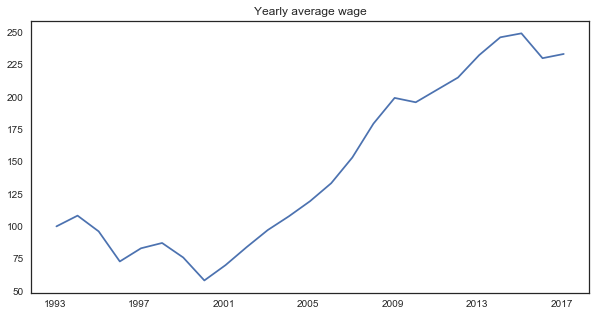

In [6]:
yearly_average = ts_wage.resample('12M').mean()
plt.figure(figsize=(10,5))
plt.plot(yearly_average)
plt.title('Yearly average wage')

#### Time series from dep36 data:

In [7]:
ts_dep36.head(5)

item 1758 item 40010 item 35731 item 96474  item 97519 item 75501  \
Timestamp                                                                      
2005-05-12         0          0      2,484          0         0.0      1,334   
2005-05-13     0,878      0,983      2,632       1,12         1.0      3,514   
2005-05-14     0,332      1,346      2,016      0,302         1.0       2,59   
2005-05-15         0      0,556      0,882          0         4.0      1,708   
2005-05-16     0,438      0,671      0,314      1,486         2.0       2,79   

            item 95519  item 93400  item 99826  item 57813     ...      \
Timestamp                                                      ...       
2005-05-12           1           1         2.0           0     ...       
2005-05-13           4           0         1.0           0     ...       
2005-05-14           0           2         0.0           1     ...       
2005-05-15           1           1         1.0           2     ...       
2005-05-16           3           0         2.0           1     ...       

            item 65825  item 31454  item 29014  item 49139  item 42190  \
Timestamp                                                                
2005-05-12           7          12           0      66,324      32,864   
2005-05-13          16          17           0      69,952      34,024   
2005-05-14          11          12           0      35,366      31,626   
2005-05-15           9          15           0      37,898      43,726   
2005-05-16          11          11           0      49,566      34,548   

            item 8110 item 80718  item 29092  item 76501  item 32258  
Timestamp                                                             
2005-05-12         12         23          63          14         177  
2005-05-13         24         30          97          13          63  
2005-05-14         20          0          80          12          94  
2005-05-15         20          0          64           6         105  
2005-05-16         23          0          43           4          51  

[5 rows x 105 columns]

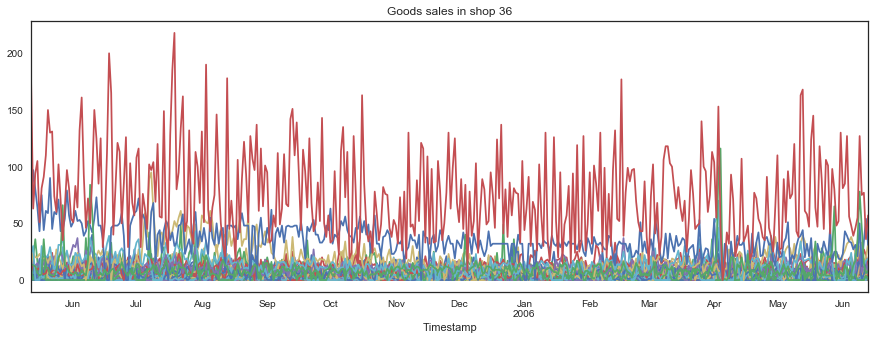

In [8]:
ts_dep36.plot(figsize=(15,5),title="Goods sales in shop 36",legend=False)

#### Time series from dep42 data:

In [9]:
ts_dep42.head(10)

item 558  item 834  item 883  item 1311  item 1396  item 1647  \
Timestamp                                                                   
2005-10-03       NaN       NaN       NaN        NaN        NaN        NaN   
2005-10-04       NaN       NaN       NaN        NaN        NaN        NaN   
2005-10-05       NaN       NaN       NaN        NaN        NaN        NaN   
2005-10-06       NaN       NaN       NaN        NaN        NaN        NaN   
2005-10-07       NaN       NaN       NaN        NaN        NaN        NaN   
2005-10-08       NaN       NaN       NaN        NaN        NaN        NaN   
2005-10-09       NaN       NaN       NaN        NaN        NaN        NaN   
2005-10-10       NaN       NaN       NaN        NaN        NaN        NaN   
2005-10-11  0.992568       NaN       NaN        NaN        NaN        NaN   
2005-10-12  0.638689       NaN       NaN        NaN        NaN        NaN   

            item 1689  item 1761  item 1969  item 2036     ...      \
Timestamp                                                  ...       
2005-10-03        NaN        NaN        NaN        NaN     ...       
2005-10-04        NaN        NaN        NaN        NaN     ...       
2005-10-05        NaN        NaN        NaN        NaN     ...       
2005-10-06        NaN        NaN        NaN        NaN     ...       
2005-10-07        NaN        NaN        NaN        NaN     ...       
2005-10-08        NaN        NaN        NaN        NaN     ...       
2005-10-09        NaN        NaN        NaN        NaN     ...       
2005-10-10        NaN        NaN        NaN        NaN     ...       
2005-10-11        NaN        NaN        1.0        NaN     ...       
2005-10-12        NaN        NaN        4.0        NaN     ...       

            item 77539  item 79279  item 80510  item 82356  item 87639  \
Timestamp                                                                
2005-10-03         NaN         NaN         NaN         NaN         NaN   
2005-10-04         NaN         NaN         NaN         NaN         NaN   
2005-10-05         NaN         NaN         NaN         NaN         NaN   
2005-10-06         NaN         NaN         NaN         NaN         NaN   
2005-10-07         NaN         NaN         NaN         NaN         NaN   
2005-10-08         NaN         NaN         NaN         NaN         NaN   
2005-10-09         NaN         NaN         NaN         NaN         NaN   
2005-10-10         NaN         NaN         NaN         NaN         NaN   
2005-10-11         NaN         NaN         NaN         NaN         NaN   
2005-10-12         NaN         NaN         NaN         NaN         NaN   

            item 88121  item 89103  item 89977  item 95417  item 96668  
Timestamp                                                               
2005-10-03         NaN         NaN         NaN         NaN         NaN  
2005-10-04         NaN         NaN         NaN         NaN         NaN  
2005-10-05         NaN         NaN         NaN         NaN         NaN  
2005-10-06         NaN         NaN         NaN         NaN         NaN  
2005-10-07         NaN         NaN         NaN         NaN         NaN  
2005-10-08         NaN         NaN         NaN         NaN         NaN  
2005-10-09         NaN         NaN         NaN         NaN         NaN  
2005-10-10         NaN         NaN         NaN         NaN         NaN  
2005-10-11         NaN         NaN         NaN         NaN         NaN  
2005-10-12         NaN         NaN         NaN         NaN         NaN  

[10 rows x 155 columns]

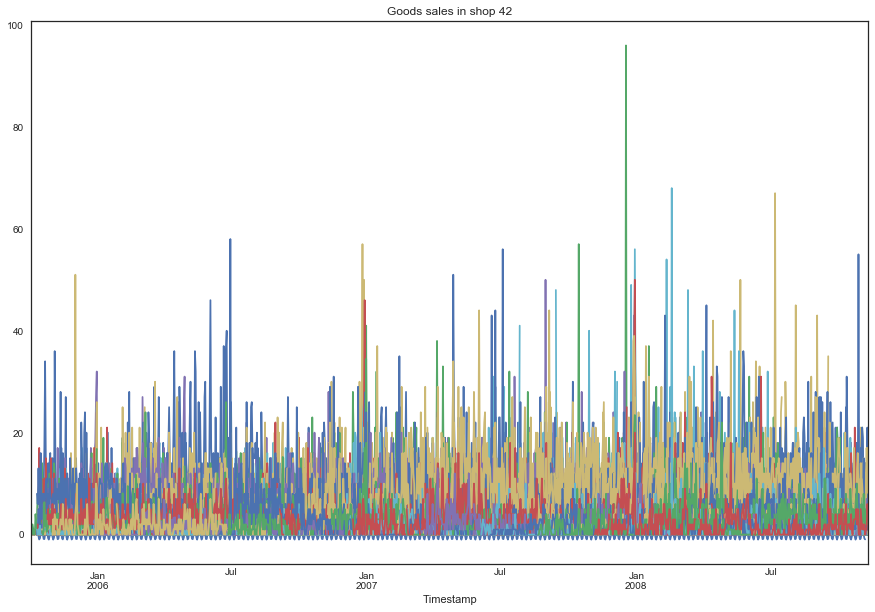

In [10]:
ts_dep42.plot(figsize=(15,10),title="Goods sales in shop 42",legend=False)

#### Time series from dep6 data:

In [11]:
ts_dep6.head(10)

item 1089  item 10960  item 1178  item 11827  item 1511  \
Timestamp                                                             
2006-11-01        1.0         2.0        0.0         3.0        3.0   
2006-11-02        2.0         2.0        4.0         0.0        0.0   
2006-11-03        4.0         4.0        1.0         3.0        3.0   
2006-11-04        0.0         3.0        2.0         1.0        1.0   
2006-11-05        4.0         8.0        1.0         2.0        1.0   
2006-11-06        0.0         3.0        1.0         2.0        0.0   
2006-11-07        0.0         3.0        1.0         2.0        1.0   
2006-11-08        0.0         2.0        3.0         1.0        1.0   
2006-11-09        1.0         1.0        1.0         9.0        5.0   
2006-11-10        6.0         0.0        2.0         3.0        3.0   

            item 15934  item 16368  item 17248  item 18232  item 18291  \
Timestamp                                                                
2006-11-01         0.0         0.0         2.0         3.0         4.0   
2006-11-02         1.0         0.0         5.0         1.0         6.0   
2006-11-03         1.0         0.0         5.0         6.0         7.0   
2006-11-04         0.0         2.0         1.0         1.0         7.0   
2006-11-05         1.0         2.0         6.0         5.0         6.0   
2006-11-06         2.0         0.0         2.0         2.0         9.0   
2006-11-07         0.0         2.0         6.0         3.0         3.0   
2006-11-08         NaN        12.0         4.0         2.0         2.0   
2006-11-09         0.0         0.0         2.0         2.0        11.0   
2006-11-10         2.0         1.0         4.0         2.0         4.0   

               ...      item 89787  item 91285  item 91845  item 93627  \
Timestamp      ...                                                       
2006-11-01     ...             3.0         NaN         NaN         NaN   
2006-11-02     ...             4.0         NaN         NaN         NaN   
2006-11-03     ...             0.0         NaN         NaN         NaN   
2006-11-04     ...             3.0         NaN         NaN         NaN   
2006-11-05     ...             6.0         NaN         NaN         NaN   
2006-11-06     ...             1.0         NaN         NaN         NaN   
2006-11-07     ...             2.0         NaN         NaN         NaN   
2006-11-08     ...             1.0         NaN         NaN         NaN   
2006-11-09     ...             3.0         NaN         NaN         NaN   
2006-11-10     ...             2.0         NaN         NaN         NaN   

            item 93634  item 96260  item 96880  item 97952  item 99146  \
Timestamp                                                                
2006-11-01         NaN         NaN         NaN         NaN         NaN   
2006-11-02         NaN         NaN         NaN         NaN         NaN   
2006-11-03         NaN         NaN         NaN         NaN         NaN   
2006-11-04         NaN         NaN         NaN         NaN         NaN   
2006-11-05         NaN         NaN         NaN         NaN         NaN   
2006-11-06         NaN         NaN         NaN         NaN         NaN   
2006-11-07         NaN         NaN         NaN         NaN         NaN   
2006-11-08         NaN         NaN         NaN         NaN         NaN   
2006-11-09         NaN         NaN         NaN         NaN         NaN   
2006-11-10         NaN         NaN         NaN         NaN         NaN   

            item 99147  
Timestamp               
2006-11-01         NaN  
2006-11-02         NaN  
2006-11-03         NaN  
2006-11-04         NaN  
2006-11-05         NaN  
2006-11-06         NaN  
2006-11-07         NaN  
2006-11-08         NaN  
2006-11-09         NaN  
2006-11-10         NaN  

[10 rows x 110 columns]

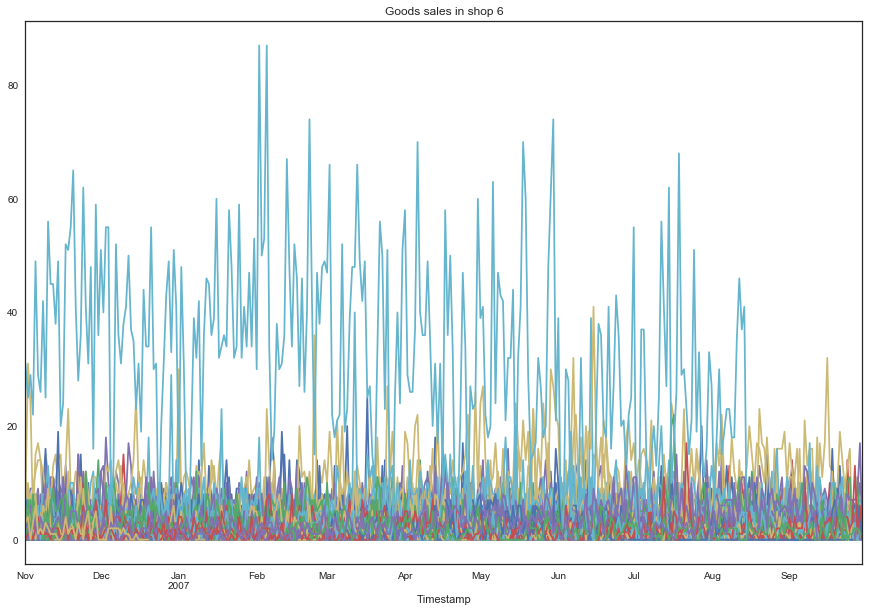

In [12]:
ts_dep6.plot(figsize=(15,10),title="Goods sales in shop 6",legend=False)

<h1 align="center">2. Apply Simple ES to data without trend and Seasonality (15%) </h1>
You need to apply SES (IES see seminar 2) model for TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

 * 1) Find the best param $\alpha$ of SES for data period from 09.1998 to 01.2015. Is the optimal value close to 0 or 1? (You can choose any loss function from seminar 2).
 * 2) Draw forecast with optimial value $\alpha$ for data from 09.1998 to 01.2017. Conclude whether SES can be used for this TS? If can not than explain why.
 * 3) Calculate accuracy of the forecast of TS in [02.2016, 01.2017].
 * 4) Aggregate original TS by Years (time step chould be 1 year). Repeat point 1)-2) for aggregated TS.

##### *some auxiliary functions

In [190]:
## empty forecast data createion as time series
def empty_frc(data,delay):
    ix = range(len(data.index))
    start = data.index[-1]+timedelta(1)
    end = data.index[-1]+timedelta(delay)
    additional_range = pd.date_range(start,end)
    frc_ts = pd.DataFrame(index = data.index.append(additional_range),
                          columns = data.columns)
    return frc_ts
    
## auxilary function to for training
''' 'complexity' is the parameter, which defines model parameters. 
Possible values are:
'_' - only SES and it's modifications without trend and seasonality except of Adaptive model, there is ALPHA
'a' - only Adaptive SES, there are ALPHA and DELTA
's' -  seasonality - there are ALPHA, GAMMA
't' - trend - there are ALPHA, BETTA
't_d' - trend + dumping - there are ALPHA, BETTA, PHI
't_s' - trend + seasonality - there are ALPHA, BETTA and GAMMA
't_s_d' - trend + seasonality + dumping - there are ALPHA, BETTA, GAMMA and PHI
'''
def train_plotting(model, complexity, parameters, train_ts, loss_function, plotting_frequency):
    
    complexity_values = ['_','a','t','s','t_d','t_s','t_s_d']  
    if complexity not in complexity_values:
        w.warn(('Complexity possible values are:'
                '\n "_" - for SES and modifications without trend and seasonality except of Adaptive model,'
                '\n "a" - for Adaptive SES,'
                '\n "t" - for trend,'
                '\n "s" - for seasonality,'
                '\n "t_s" - for trend and seasonality,'
                '\n "t_d" - for trend and dumping,'
                '\n "t_s_d" - for trend, seasonality and dumping'))
        assert()
    
    h = parameters['DELAY']
    p1 = parameters['ALPHA']
    p2 = parameters['BETTA']
    p3 = parameters['GAMMA']
    p4 = parameters['PHI']
    p5 = parameters['DELTA']
    p6 = parameters['SEASONALITY_PERIOD']
    p7 = parameters['ADAPTATION_PERIOD']
    
    _ = [np.nan]

    if complexity == '_':
        loop = itertools.product(p1, _, _, _, _, _, p7, repeat=1)
        loss_matrix = np.zeros((len(p1)*len(_)*len(_)*len(_)*len(_)*len(_)*len(p7),8))
    if complexity == 'a':
        loop = itertools.product(p1, _, _, _, p5, _, p7, repeat=1)
        loss_matrix = np.zeros((len(p1)*len(_)*len(_)*len(_)*len(p5)*len(_)*len(p7),8))        
    elif complexity == 't':
        loop = itertools.product(p1, p2, _, _, _, _, _, repeat=1)
        loss_matrix = np.zeros((len(p1)*len(p2)*len(_)*len(_)*len(_)*len(_)*len(_),8))
    elif complexity == 's':
        loop = itertools.product(p1, _, p3, _, _, p6, _, repeat=1)
        loss_matrix = np.zeros((len(p1)*len(_)*len(p3)*len(_)*len(_)*len(p6)*len(_),8))
    elif complexity == 't_s':
        loop = itertools.product(p1, p2, p3, _, _, p6, _, repeat=1)
        loss_matrix = np.zeros((len(p1)*len(p2)*len(p3)*len(_)*len(_)*len(p6)*len(_),8))
    elif complexity == 't_d':
        loop = itertools.product(p1, p2, _, p4, _, _, _, repeat=1)
        loss_matrix = np.zeros((len(p1)*len(p2)*len(_)*len(p4)*len(_)*len(_)*len(_),8))
    elif complexity == 't_s_d':
        loop = itertools.product(p1, p2, p3, p4, _, p6, _, repeat=1)
        loss_matrix = np.zeros((len(p1)*len(p2)*len(p3)*len(p4)*len(_)*len(p6)*len(_),8))
        
    optimal_result = {}   
    
    ix = range(len(train_ts.index))
    i = 0
    for alpha, betta, gamma, phi, delta,sp,ap in loop:
        forecasted_ts = empty_frc(data=train_ts,delay=h)
        for columns in train_ts.columns:
            forecasted_ts[columns] = model(train_ts[columns], h,
                                 {'alpha':alpha, 'betta':betta, 'gamma':gamma, 'phi':phi, 
                                  'delta':delta, 'seasonality_period':sp, 'adaptation_period':ap})
            
        loss,_ = loss_function(train_ts.iloc[ix], forecasted_ts.iloc[ix])
        loss_matrix[i][0] = loss_matrix[i][0] + alpha
        loss_matrix[i][1] = loss_matrix[i][1] + betta
        loss_matrix[i][2] = loss_matrix[i][2] + gamma
        loss_matrix[i][3] = loss_matrix[i][3] + phi
        loss_matrix[i][4] = loss_matrix[i][4] + delta
        loss_matrix[i][5] = loss_matrix[i][5] + sp
        loss_matrix[i][6] = loss_matrix[i][6] + ap
        loss_matrix[i][7] = loss_matrix[i][7] + loss
        i = i + 1
        
        
        if i % plotting_frequency == 0:
            title = ''
            title = ('Alpha=' + str('{:0.2f}'.format(alpha)) + ', Betta=' + str('{:0.2f}'.format(betta)) + 
                     ', Gamma=' + str('{:0.2f}'.format(gamma)) + ', Phi=' + str('{:0.2f}'.format(phi)) + 
                     ', Delta=' + str('{:0.2f}'.format(delta)) + ', Loss=' + str('{:0.2f}'.format(loss.values[0])))
            plt.figure(figsize=(15,5))
            plt.plot(train_ts,linewidth=1.0,label='true data')
            plt.plot(forecasted_ts,linewidth=2.0, label='forecasted data')
            plt.legend()
            plt.xlabel("Time ticks")
            plt.ylabel("TS values")
            plt.title(title, fontsize=16)

    index = np.argmin(loss_matrix[:,7])
    optimal_result['model'] = model
    optimal_result['delay'] = h
    optimal_result['alpha'] = loss_matrix[index][0]
    optimal_result['betta'] = loss_matrix[index][1]
    optimal_result['gamma'] = loss_matrix[index][2]
    optimal_result['phi'] = loss_matrix[index][3]
    optimal_result['delta'] = loss_matrix[index][4]
    optimal_result['loss'] = loss_matrix[index][7]
    
    if np.isnan(loss_matrix[index][5]):
        optimal_result['seasonality_period'] = loss_matrix[index][5]
    else: 
        optimal_result['seasonality_period'] = int(loss_matrix[index][5])
        
    if np.isnan(loss_matrix[index][6]):
        optimal_result['adaptation_period'] = loss_matrix[index][6]
    else: 
        optimal_result['adaptation_period'] = int(loss_matrix[index][6])    
        
    return optimal_result, loss_matrix

## only optimal forecast
def optimal_forecast(data, optimal_result):
    
    delay = optimal_result['delay']
    model = optimal_result['model']
    forecast_ts = empty_frc(data,delay)
    for cntr in data.columns:
        forecast_ts[cntr] = model(data[cntr], delay, optimal_result)
    return forecast_ts

## only optimal forecast
def print_optimal_result(optimal_result):
    print('Optimal paramaters for model =', optimal_result['model'].__name__, 'are:'
          '\n optimal_alpha =', '{:0.2f}'.format(optimal_result['alpha']),
          '\n optimal_betta =', '{:0.2f}'.format(optimal_result['betta']),
          '\n optimal_gamma =', '{:0.2f}'.format(optimal_result['gamma']),
          '\n optimal_phi =', '{:0.2f}'.format(optimal_result['phi']),
          '\n optimal_delta =', '{:0.2f}'.format(optimal_result['delta']),
          '\n optimal_seasonality_period =', '{:0.0f}'.format(optimal_result['seasonality_period']),
          '\n optimal_adaptation_period =', '{:0.0f}'.format(optimal_result['adaptation_period'])
         )
    return [
           optimal_result['model'].__name__, optimal_result['alpha'], optimal_result['betta'], optimal_result['gamma'],
           optimal_result['phi'], optimal_result['delta'], optimal_result['seasonality_period'], optimal_result['adaptation_period']
           ]
    
    

### 2.1 Optimal Alpha finding

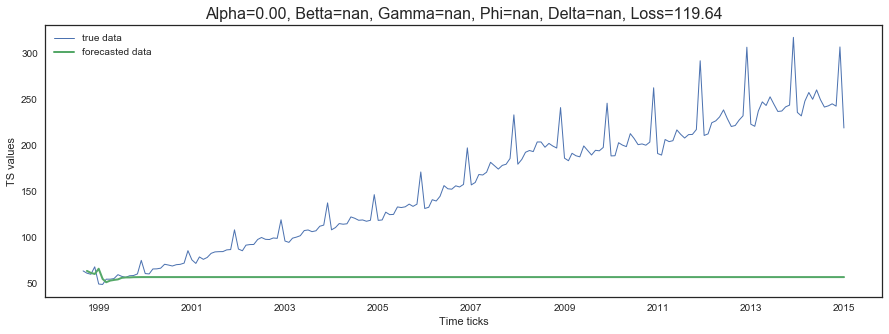

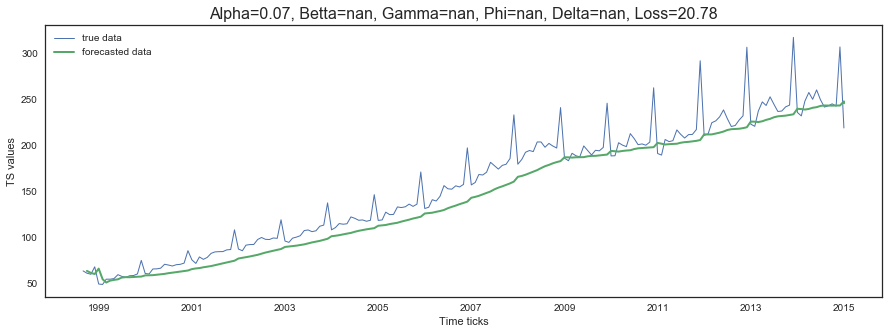

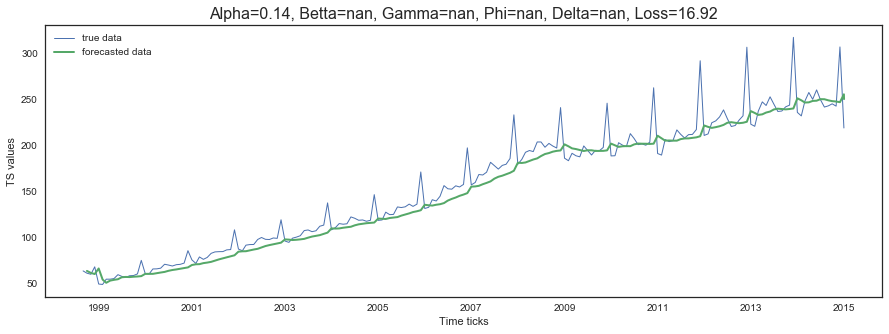

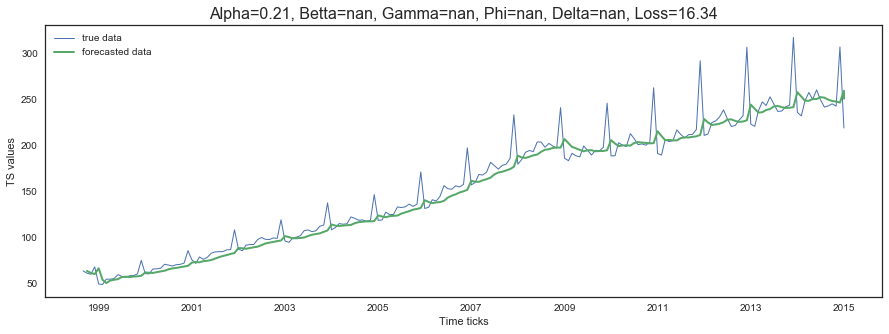

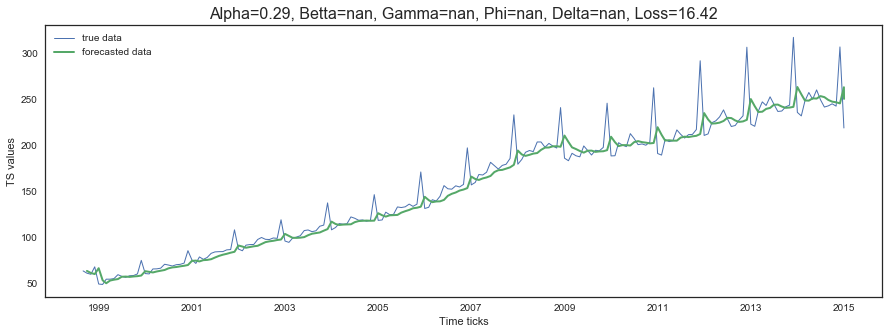

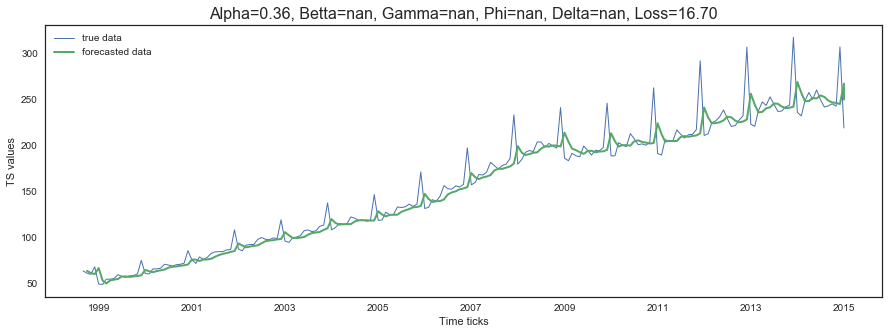

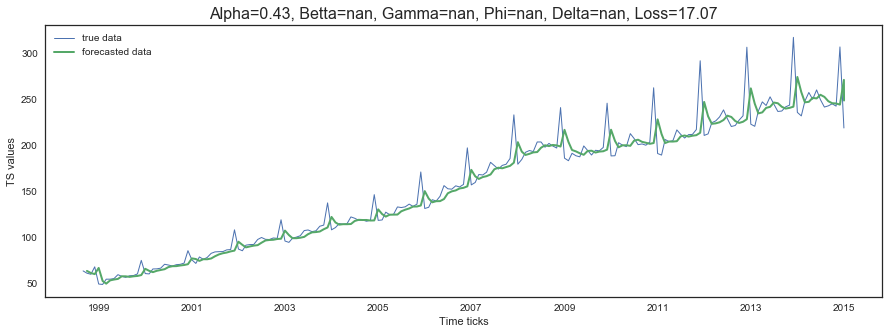

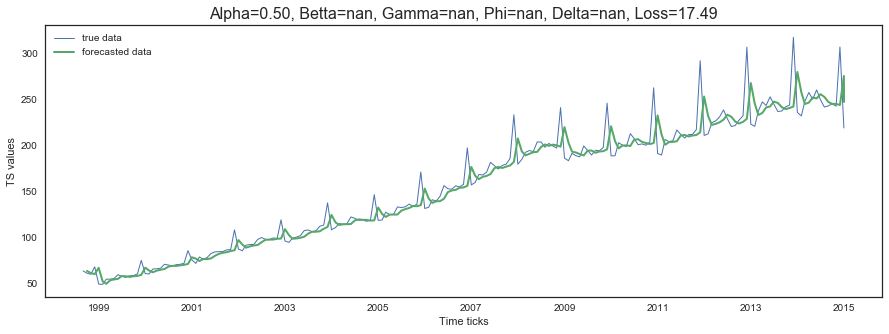

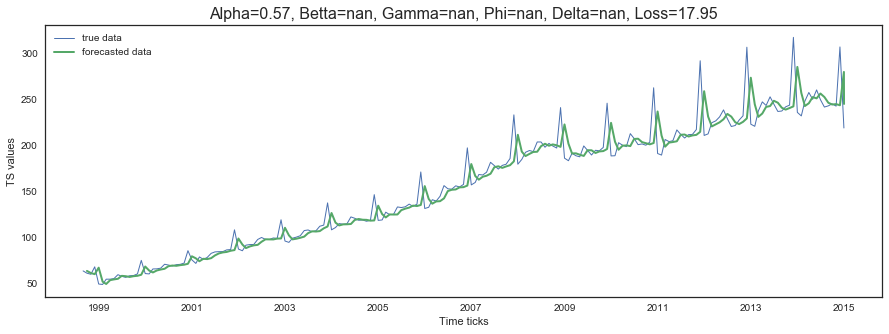

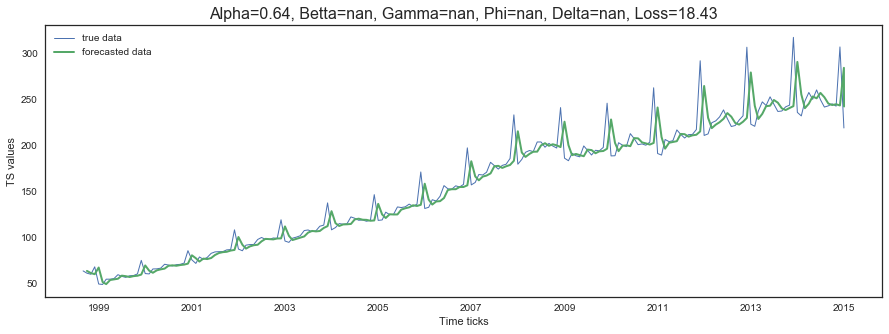

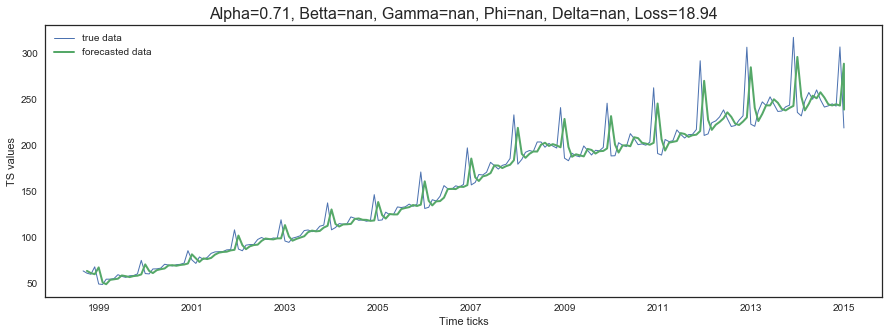

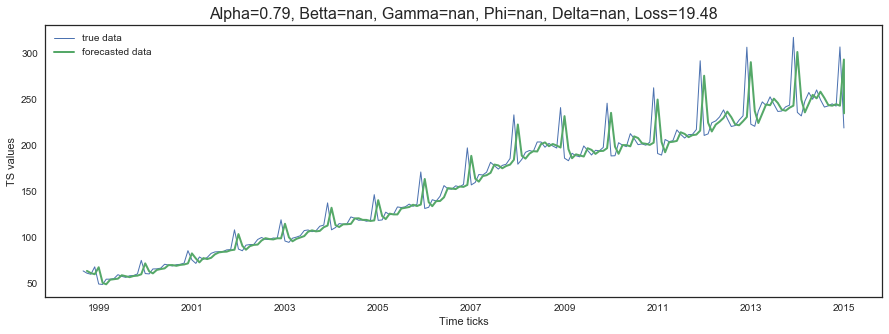

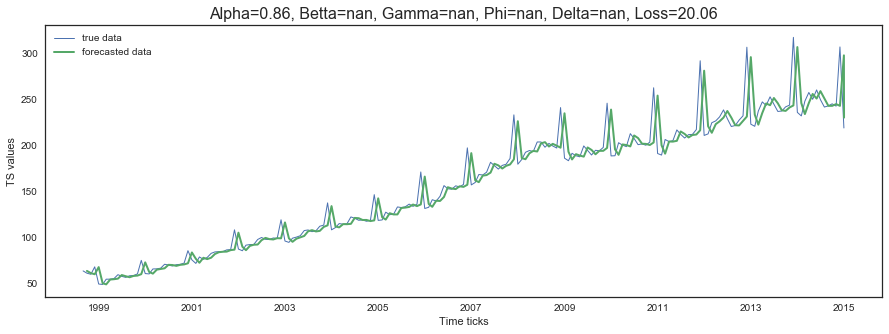

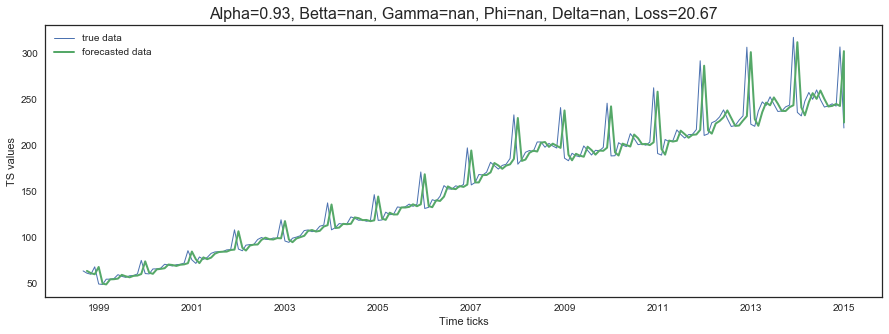

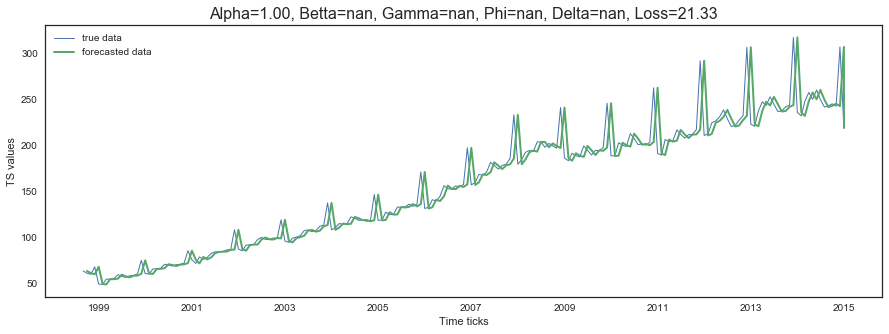

In [14]:
numbers = np.linspace(start=0,stop=1,num=15)
p = {'ALPHA':numbers, 'BETTA':numbers, 'GAMMA':numbers, 'PHI':numbers, 'DELTA':numbers/1000,
     'SEASONALITY_PERIOD':[12],'ADAPTATION_PERIOD':[5,10,15],'DELAY':1}

train_ts_wage = ts_wage.loc['1998-09-01': '2015-01-01']
testing_ts_wage = ts_wage['2016-01-01':'2017-01-01']

optimal_paramaters_ES_adpt, loss_matrix_ES_adpt = train_plotting(model = SES_AP, complexity = '_',
                                                        parameters = p, train_ts = train_ts_wage,
                                                        loss_function = qualityRMSE,
                                                        plotting_frequency = 3)

In [15]:
print_optimal_result(optimal_paramaters_ES_adpt)

Optimal paramaters for model = SES_AP are:
 optimal_alpha = 0.21 
 optimal_betta = nan 
 optimal_gamma = nan 
 optimal_phi = nan 
 optimal_delta = nan 
 optimal_seasonality_period = nan 
 optimal_adaptation_period = 15


#### Conclusion: 
Mathematically loss is minimal, when alpha is around 0.2 ~ 0.25.

The best similarity alpha is around ~ 1.


In [16]:
similar_paramaters_ES_adpt = optimal_paramaters_ES_adpt.copy()
similar_paramaters_ES_adpt['alpha'] = 0.99

optimal_forecast_ES_adpt = optimal_forecast(ts_wage,optimal_paramaters_ES_adpt)
similar_forecast_ES_adpt = optimal_forecast(ts_wage,similar_paramaters_ES_adpt)

### 2.2 Plotting optimal forecast, similar forecast and real data:

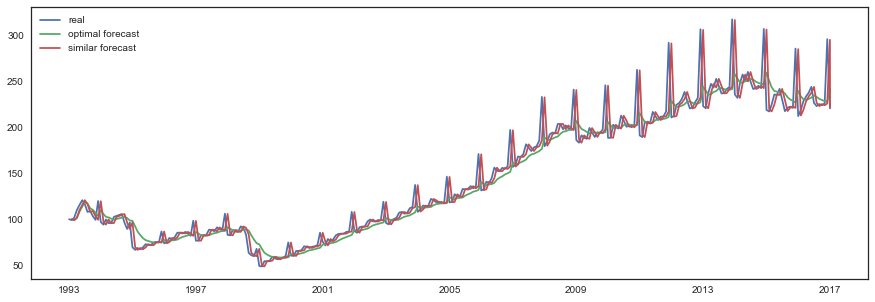

In [17]:
plt.figure(figsize=(15,5))
plt.plot(ts_wage, label='real')
plt.plot(optimal_forecast_ES_adpt, label='optimal forecast')
plt.plot(similar_forecast_ES_adpt, label='similar forecast' )
plt.legend()

### 2.3 Accuracy of optimal Alpha

In [18]:
testing_forecast_ES_adpt = optimal_forecast_ES_adpt['2016-01-01':'2017-01-01']

ix = range(len(testing_forecast_ES_adpt.index))

loss, _ =  qualityMACAPE(testing_ts_wage.iloc[ix], testing_forecast_ES_adpt.iloc[ix])
accuracy = 1 - loss
print('Accuracy =','{:0.2f}%'.format(accuracy.values[0]*100))

Accuracy = 93.98%


### 2.4 Solution for aggregeated data

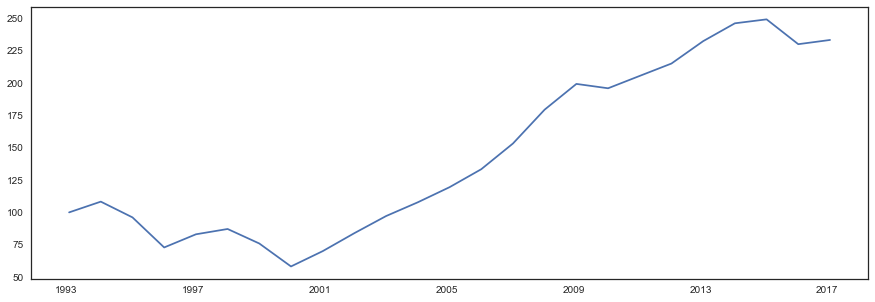

In [19]:
ts_wage_aggregated = ts_wage.resample('12M').mean()
plt.figure(figsize=(15,5))
plt.plot(ts_wage_aggregated)

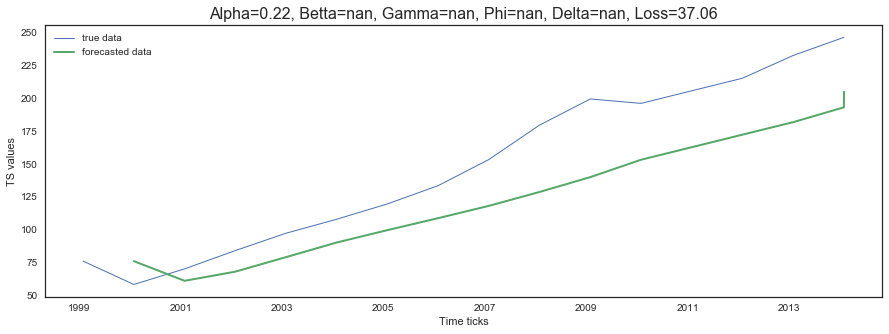

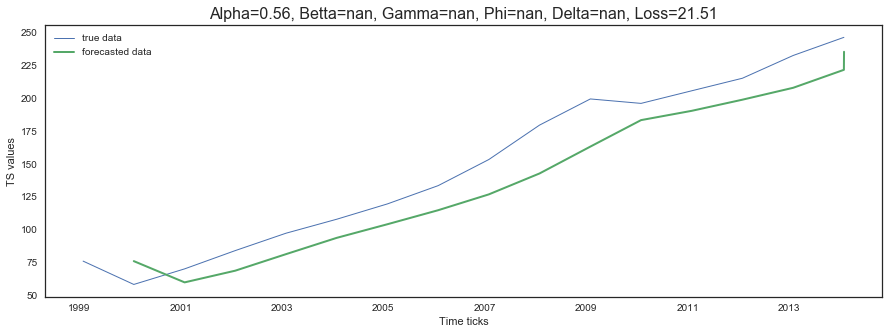

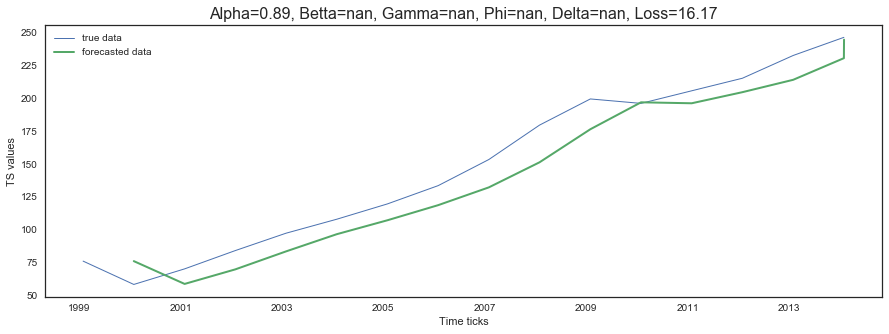

In [20]:
numbers = np.linspace(start=0,stop=1,num=10)
p = {'ALPHA':numbers, 'BETTA':numbers, 'GAMMA':numbers, 'PHI':numbers, 'DELTA':numbers/1000,
     'SEASONALITY_PERIOD':[12],'ADAPTATION_PERIOD':[10],'DELAY':1}

train_ts_wage_aggregated = ts_wage_aggregated.loc['1998-09-01': '2015-01-01']
testing_ts_wage_aggregated = ts_wage_aggregated['2016-01-01':'2017-01-01']

optimal_paramaters_agg_ES_adpt, loss_matrix_agg_ES_adpt = train_plotting(model = SES_AP, complexity = '_',
                                                        parameters = p, train_ts = train_ts_wage_aggregated,
                                                        loss_function = qualityRMSE,
                                                        plotting_frequency = 3)

In [21]:
print_optimal_result(optimal_paramaters_agg_ES_adpt)

Optimal paramaters for model = SES_AP are:
 optimal_alpha = 1.00 
 optimal_betta = nan 
 optimal_gamma = nan 
 optimal_phi = nan 
 optimal_delta = nan 
 optimal_seasonality_period = nan 
 optimal_adaptation_period = 10


### Conclusion: Optimal $\alpha = 1$

In [22]:
optimal_forecast_agg_ES_adpt = optimal_forecast(ts_wage_aggregated,optimal_paramaters_agg_ES_adpt)

#### Plotting optimal forecast and real data:

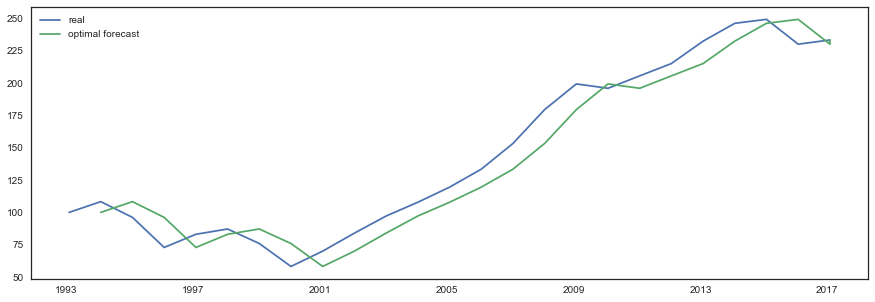

In [23]:
plt.figure(figsize=(15,5))
plt.plot(ts_wage_aggregated, label='real')
plt.plot(optimal_forecast_agg_ES_adpt,label='optimal forecast')
plt.legend()

#### Accuracy of optimal Alpha

In [24]:
testing_forecast_agg_ES_adpt = optimal_forecast_agg_ES_adpt['2016-01-01':'2017-01-01']

ix = range(len(testing_forecast_agg_ES_adpt.index))

loss, _ =  qualityMACAPE(testing_ts_wage_aggregated.iloc[ix], testing_forecast_agg_ES_adpt.iloc[ix])
accuracy = 1 - loss
print('Accuracy =','{:0.1f}%'.format(accuracy.values[0]*100))

Accuracy = 92.0%


<h1 align="center">3. Winters model for Additive Seasonality (25%) </h1>
You need to realize ES model for TS with additive seasonality and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Winters model for Seasonal TS (use code from seminar 2 as example)
* 2) Find optimal params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2016, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of SES: is it better? 
* \*5) Conclude whether Winter's ES can be used for this TS?

### 3.1 Winters model

In [25]:
'''We will use the following naming convention for ES models:

"SES" - Simple ES
"SES_modification" - simple modifications of SES without adding trend and seasonality 
(such as normalization, adaptivie and etc.)

"ES_At"      - ES with additive trend
"ES_At_d"    - ES with additive trend and dumping
"ES_As"      - ES with additive seasonality (Winters)
"ES_At_As"   - ES with additive trend, additive seasonality (Theil_Wage)
"ES_At_As_d" - additive trend, additive seasonality and dumping
....

in case of Multiplicative models the 'A' will be changed to 'M', for exapmple

"ES_At_Ms"   - ES with additive trend, multiplicative seasonality
....

'''



def ES_As(series, h, Params):
    series = np.array(series)
    T = len(series)
    alpha = Params['alpha']
    gamma = Params['gamma']
    p = Params['seasonality_period']

    FORECAST = [np.NaN]*(T+h)

    if alpha>1 and gamma>1:
        w.warn('Alpha can not be more than 1')
        w.warn('Gamma can not be more than 1')
        return FORECAST

    if alpha<0 and gamma<0:
        w.warn('Alpha can not be less than 0')
        w.warn('Gamma can not be less than 0')
        return FORECAST
    
    # initialization of level and seasonality
    l = np.mean(series[:p]) # level
    s = series[:p]-l        # seasonality

    for t in range(T):
        if not math.isnan(series[t]):
            if math.isnan(l):
                l = np.mean(series[t:t+p]) 
            if math.isnan(s[t % p]):
                s[t % p] = series[t] - l 
            old_l = l            
            l = alpha*(series[t]-s[t % p]) + (1-alpha)*l
            s[t % p] = gamma*(series[t] - old_l) + (1-gamma)*s[t % p] 
            
        FORECAST[t+h] = l + s[(t+h) % p]
    return FORECAST


### 3.2 Optimal parameters finding

C:\Users\AM000110\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


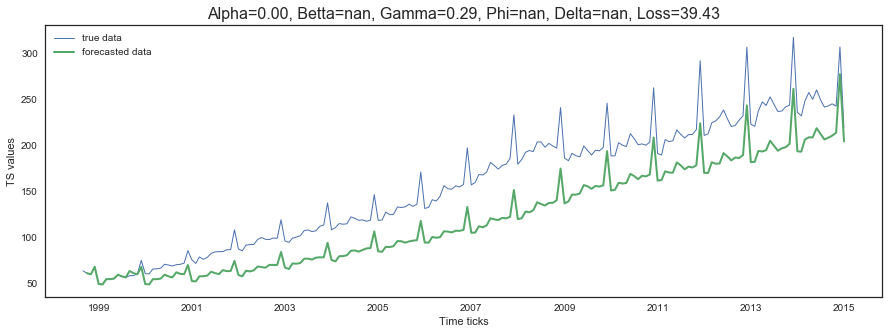

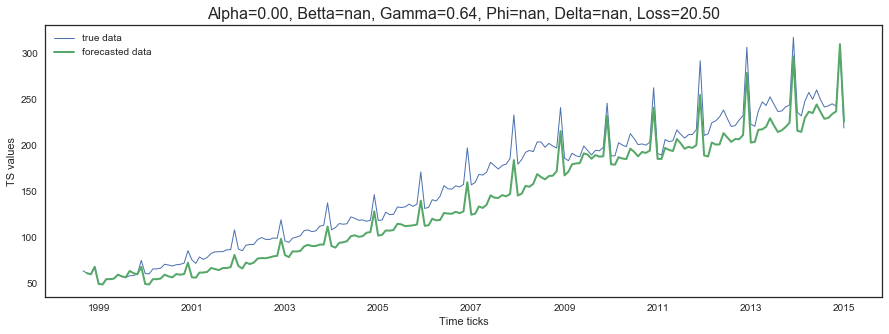

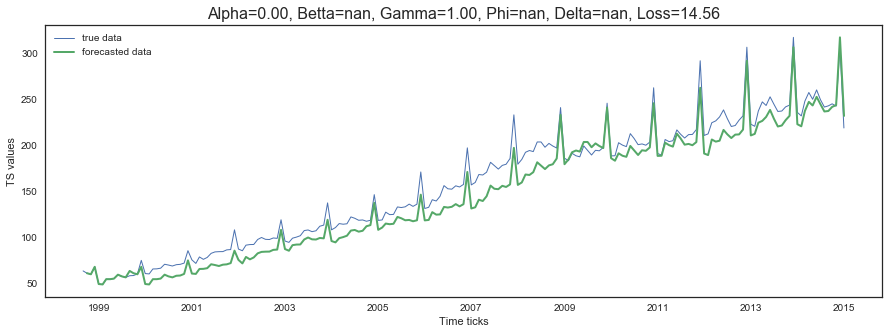

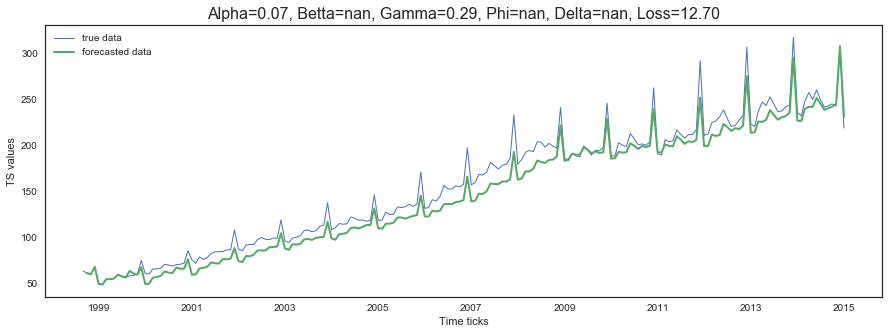

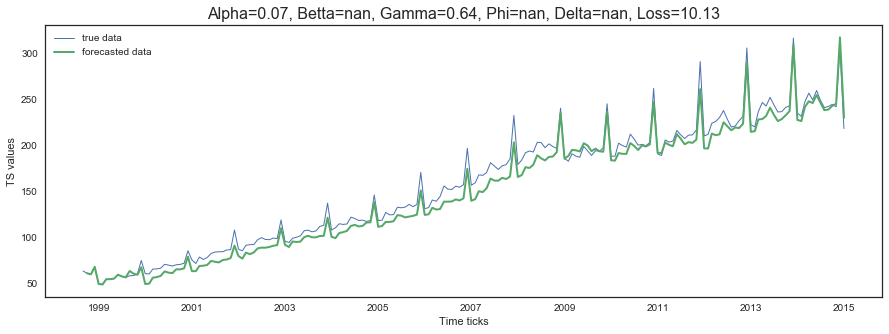

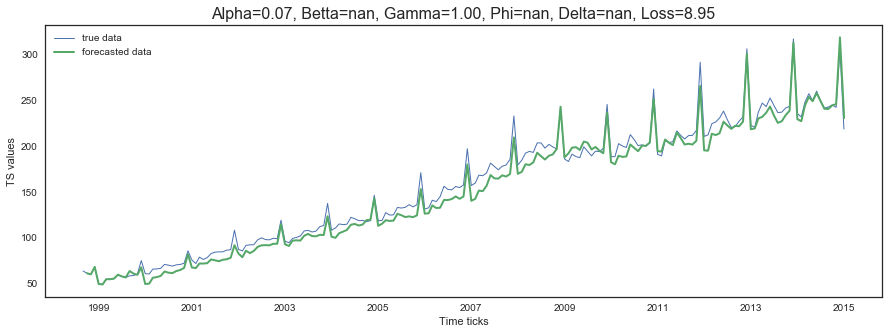

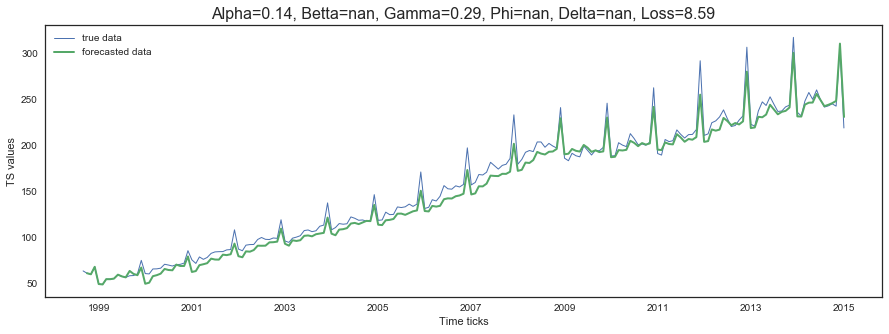

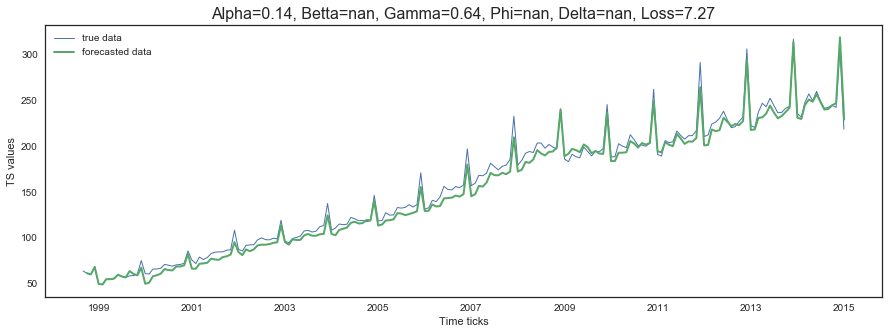

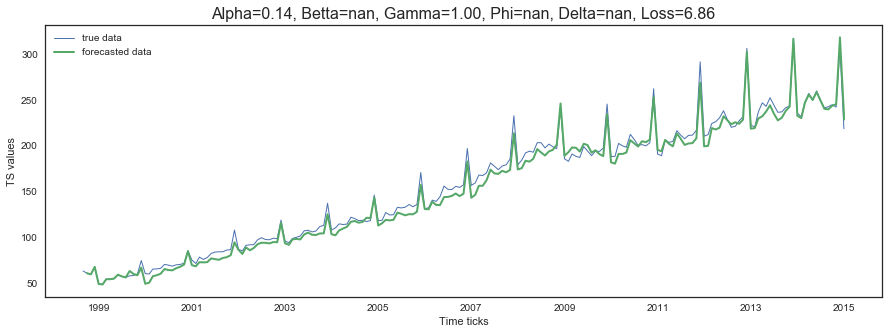

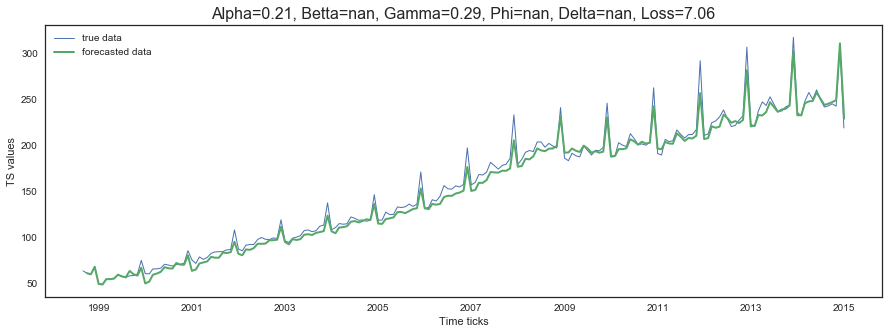

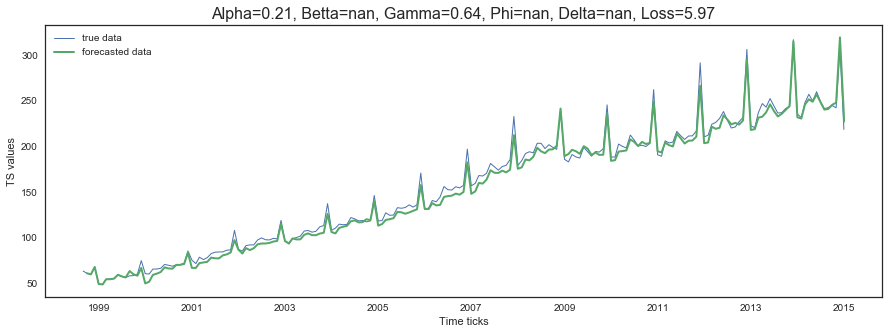

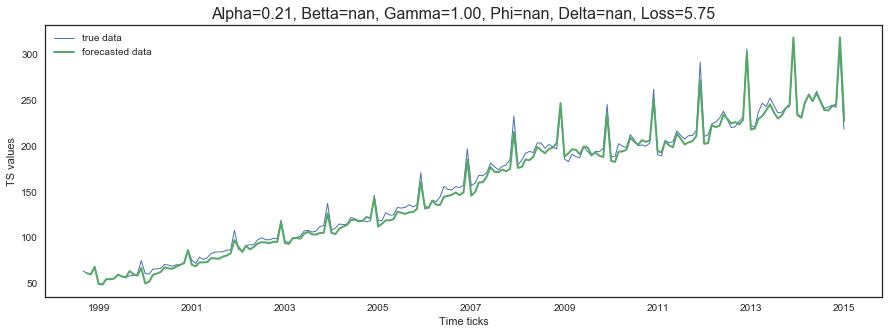

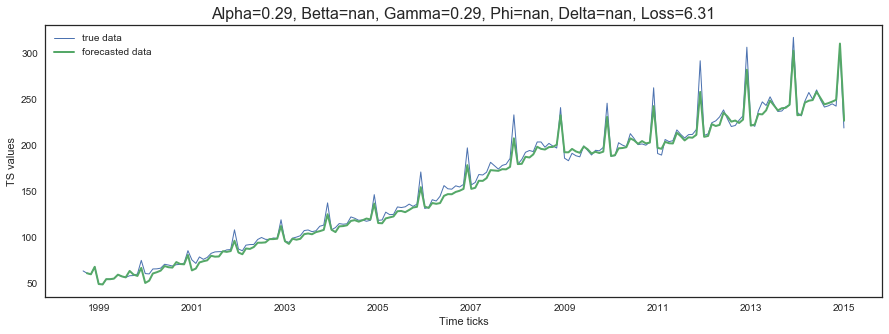

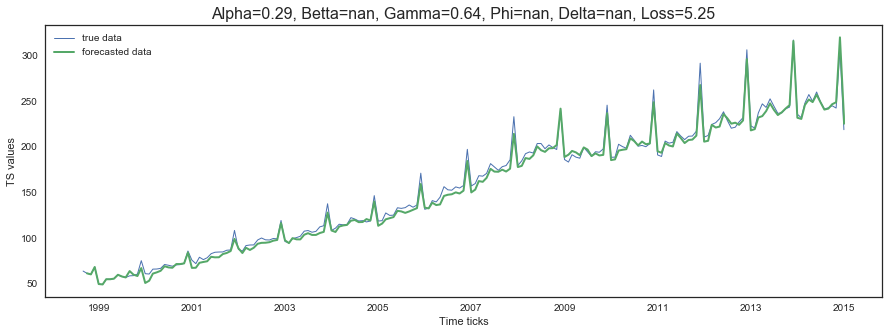

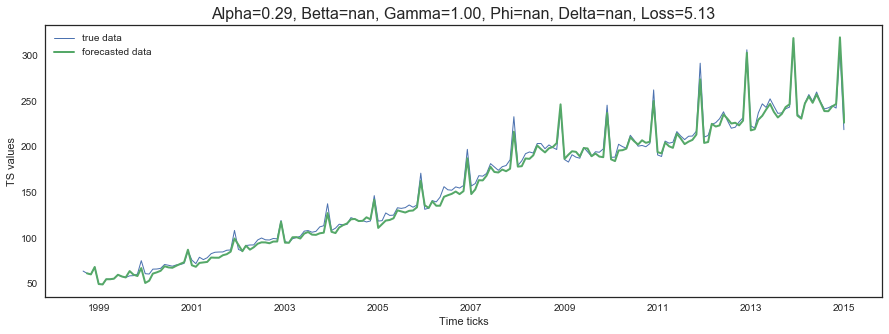

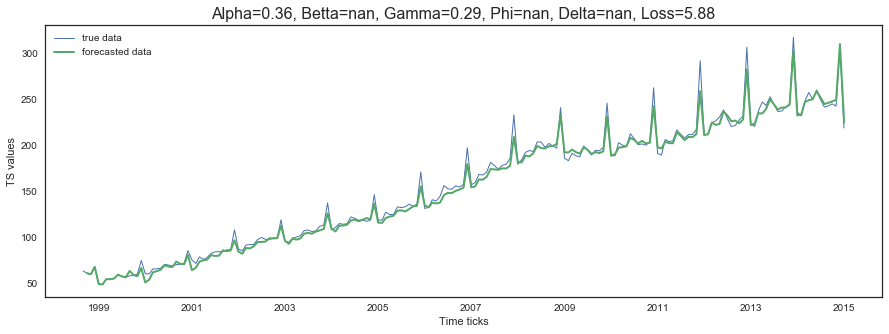

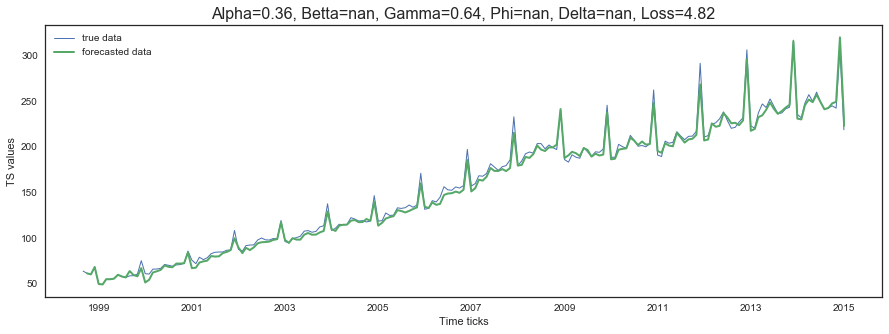

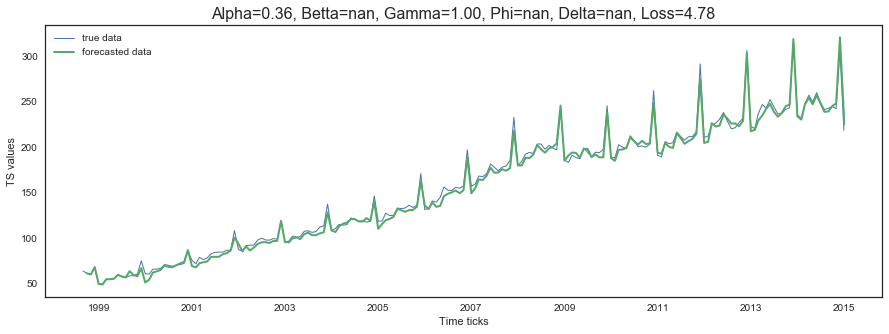

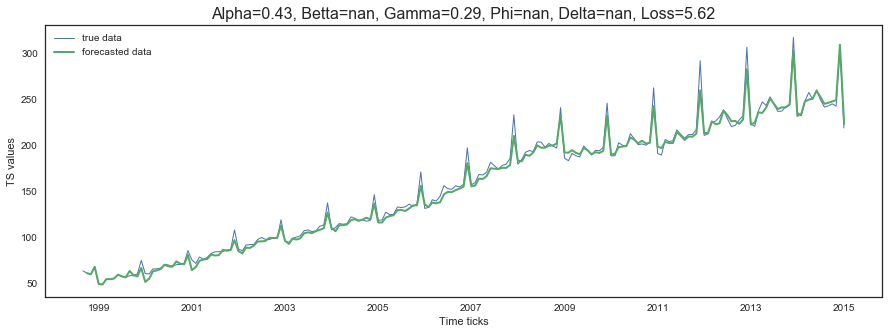

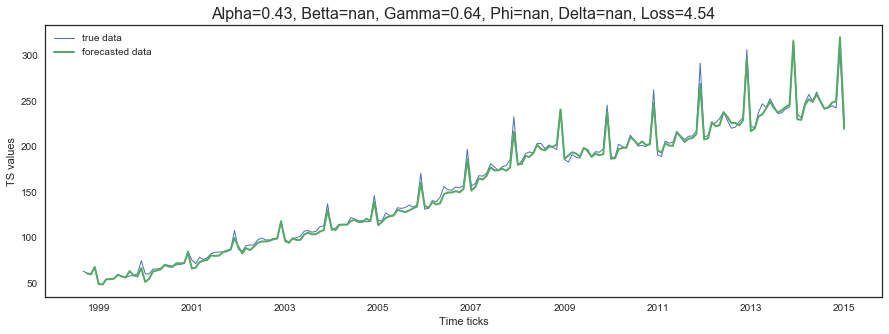

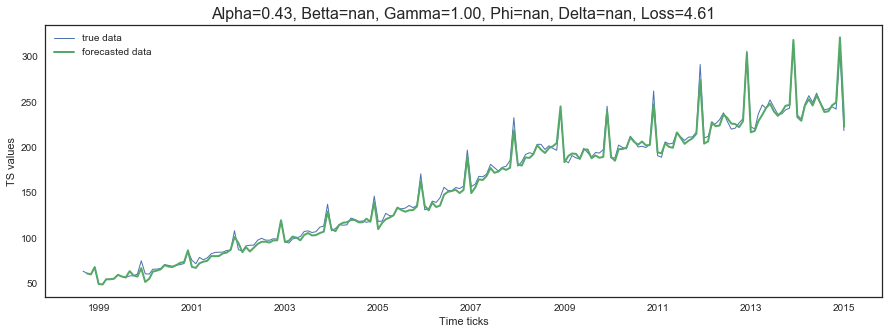

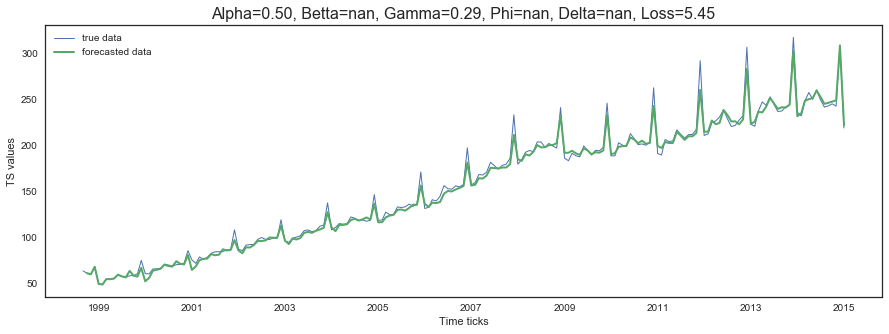

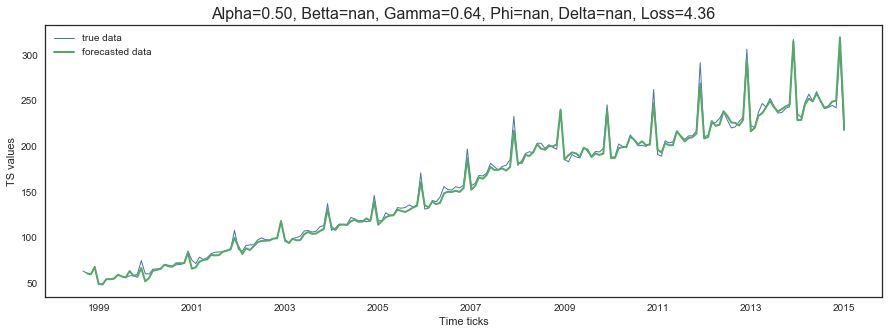

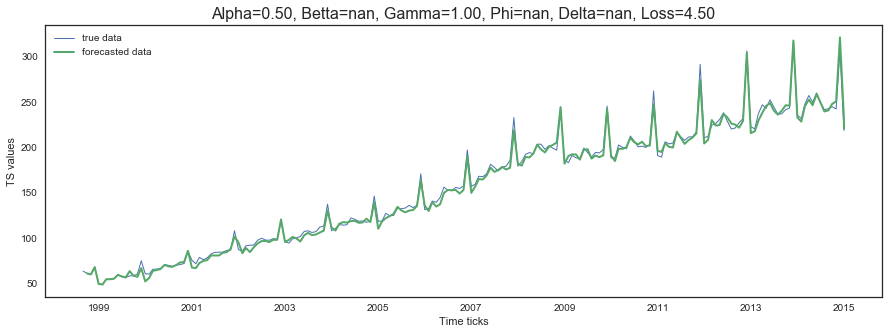

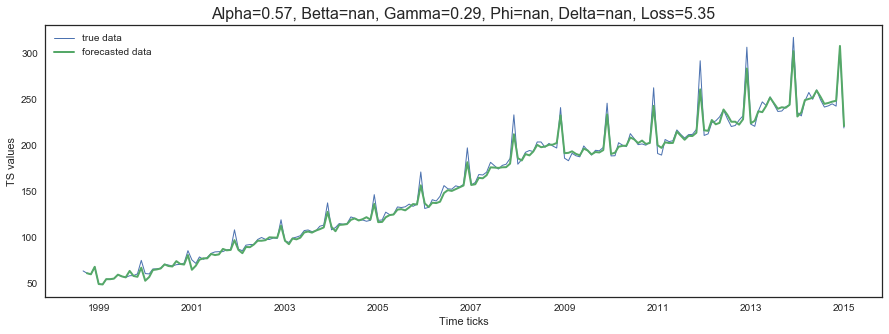

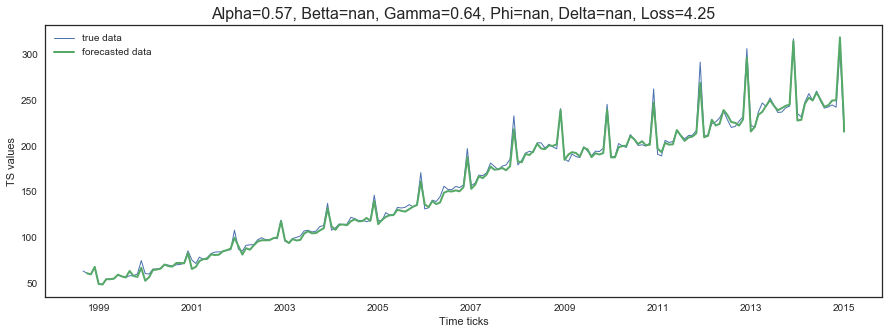

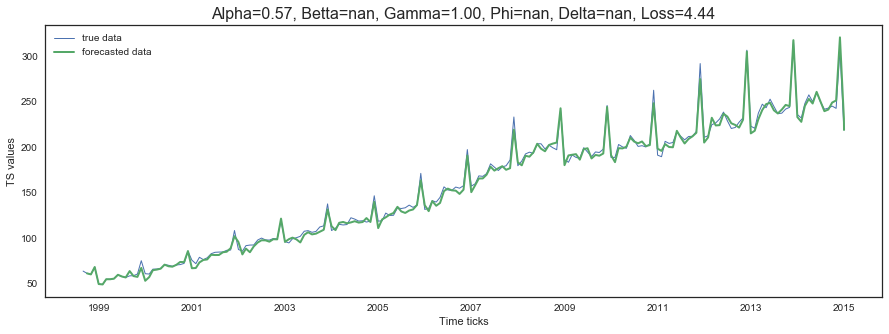

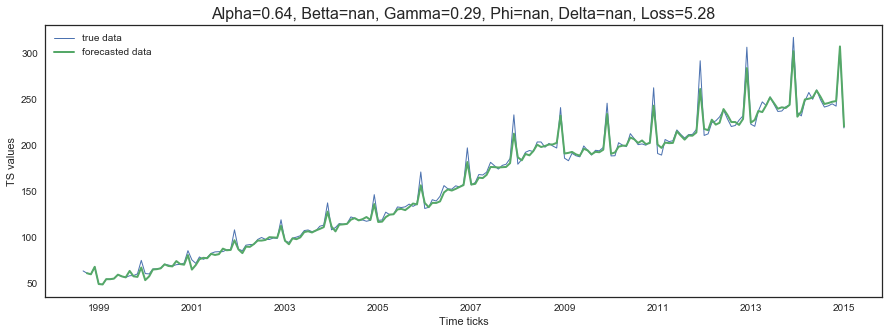

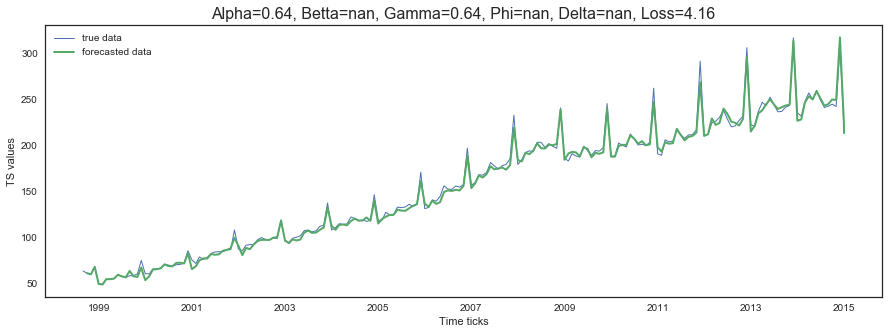

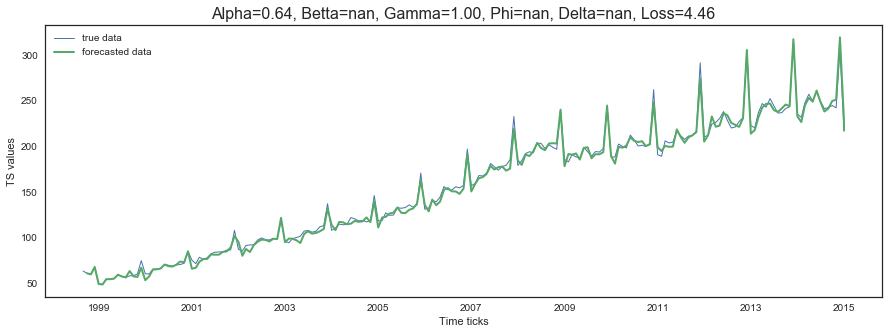

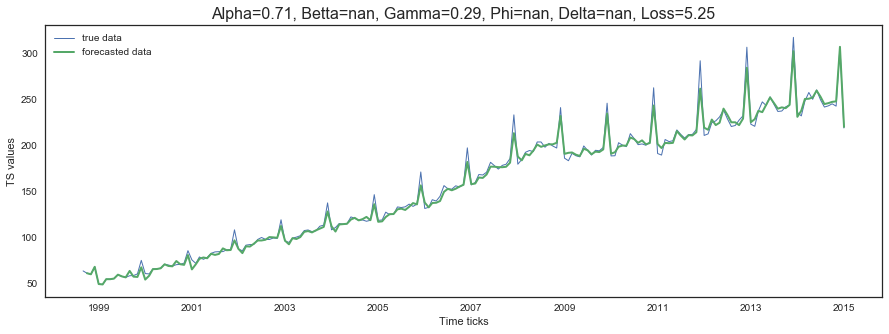

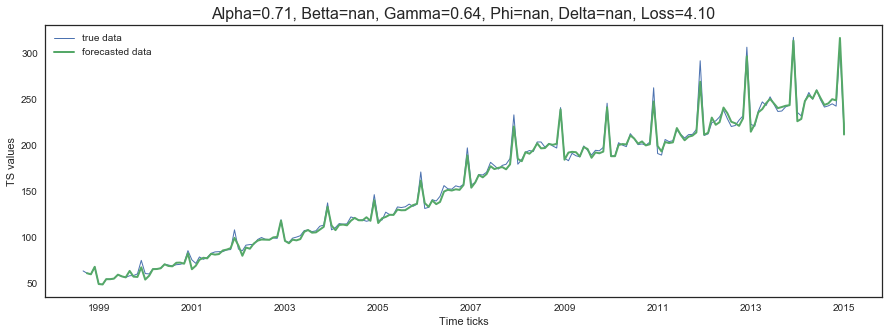

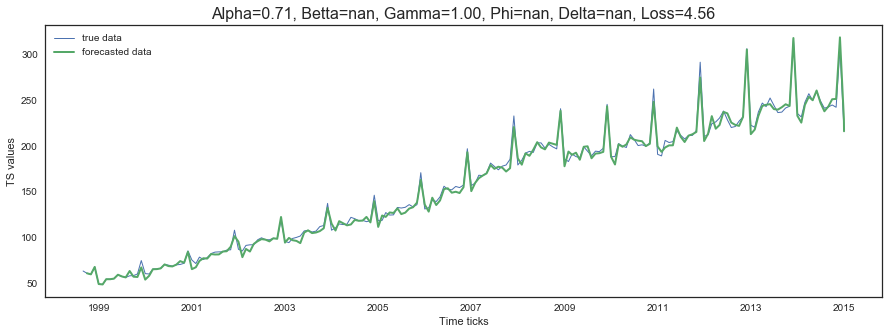

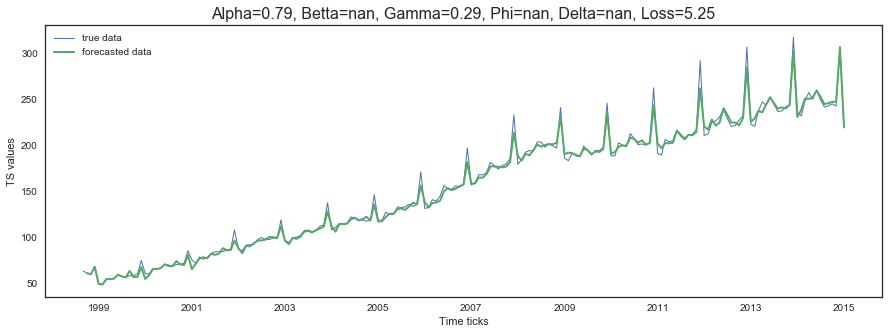

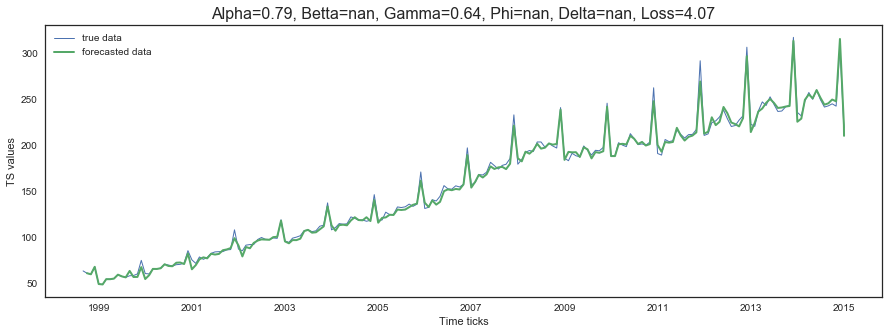

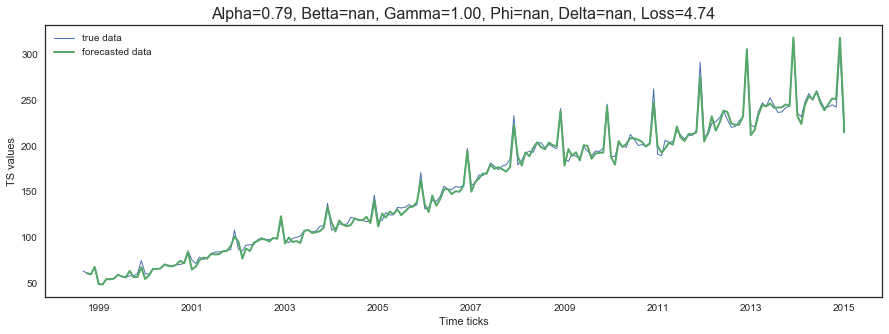

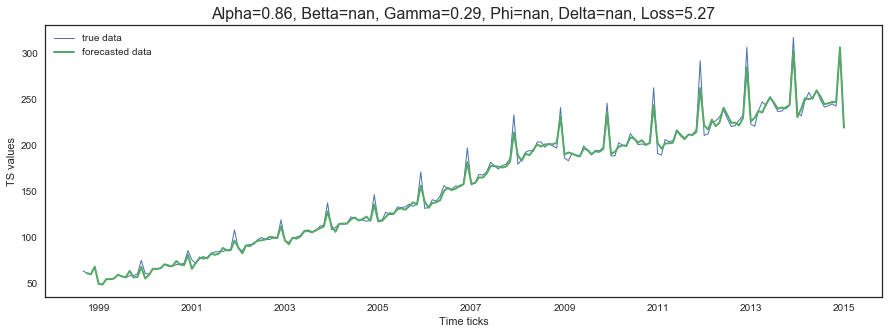

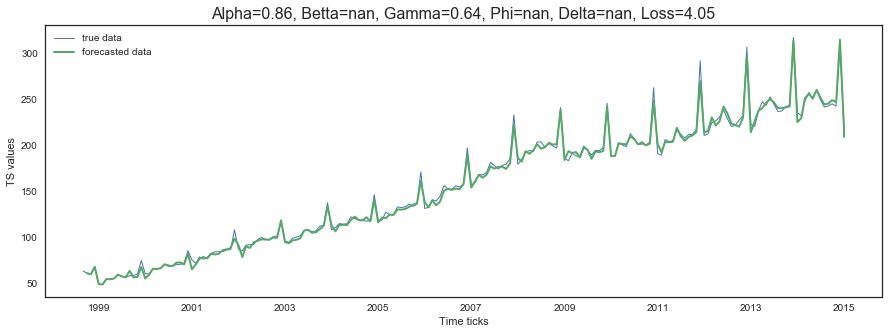

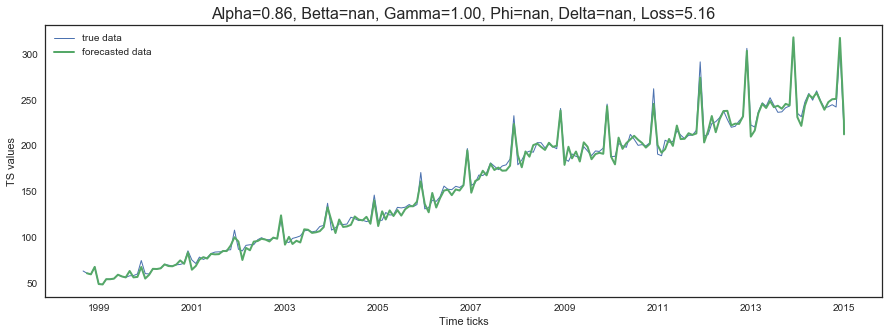

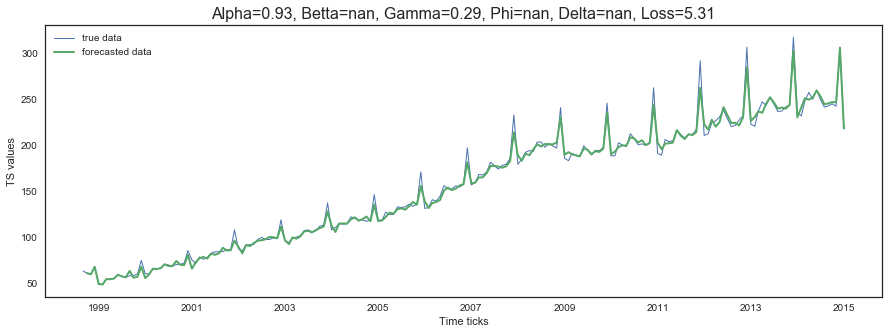

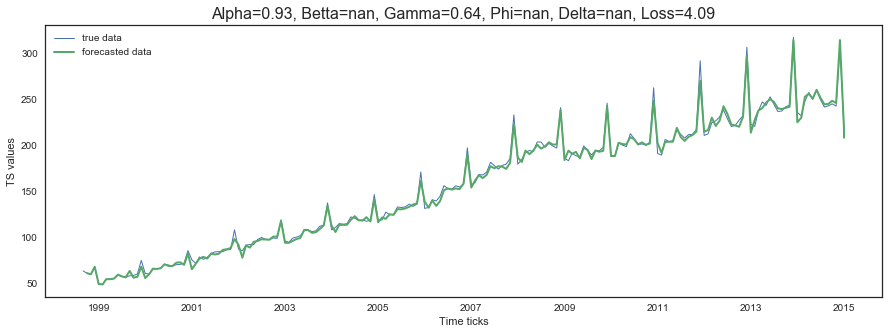

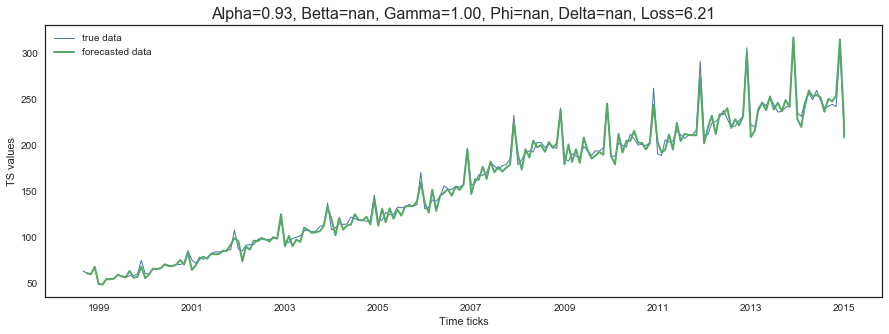

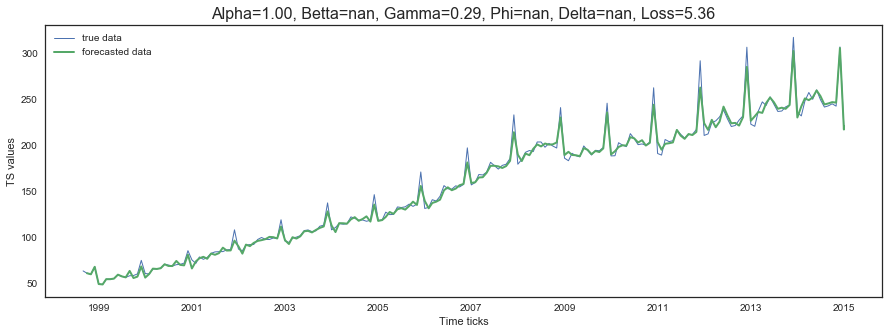

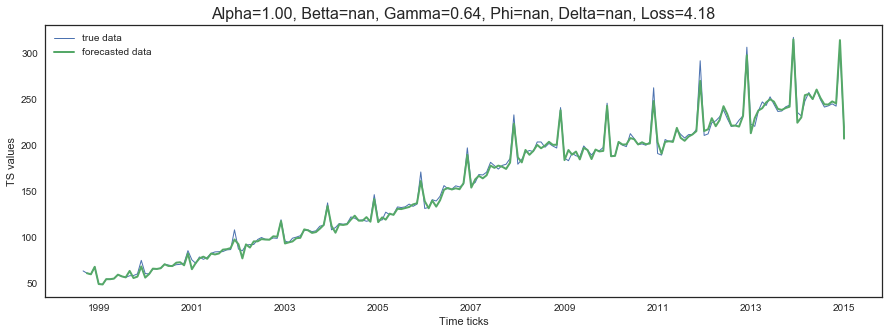

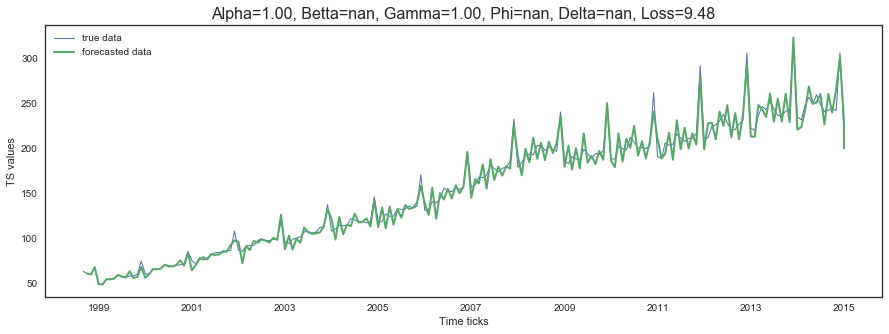

In [26]:
numbers = np.linspace(start=0,stop=1,num=15)
p = {'ALPHA':numbers, 'BETTA':numbers, 'GAMMA':numbers, 'PHI':numbers, 'DELTA':numbers/1000,
     'SEASONALITY_PERIOD':[10,12],'ADAPTATION_PERIOD':[10],'DELAY':1}

train_ts_wage = ts_wage.loc['1998-09-01': '2015-01-01']
testing_ts_wage = ts_wage['2016-01-01':'2017-01-01']

optimal_paramaters_ES_As, loss_matrix_ES_As = train_plotting(model = ES_As, complexity = 's',
                                                        parameters = p, train_ts = train_ts_wage,
                                                        loss_function = qualityRMSE,
                                                        plotting_frequency = 10)

In [27]:
print_optimal_result(optimal_paramaters_ES_As)

Optimal paramaters for model = ES_As are:
 optimal_alpha = 0.86 
 optimal_betta = nan 
 optimal_gamma = 0.64 
 optimal_phi = nan 
 optimal_delta = nan 
 optimal_seasonality_period = 12 
 optimal_adaptation_period = nan


### Conclusion: Optimal $\alpha = 0.86, \gamma = 0.64$

### 3.3 Plotting optimal forecast and real data:

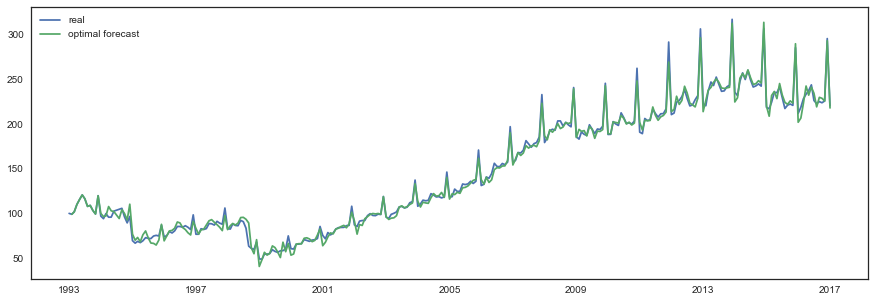

In [28]:
optimal_forecast_ES_As = optimal_forecast(ts_wage,optimal_paramaters_ES_As)

plt.figure(figsize=(15,5))
plt.plot(ts_wage, label='real')
plt.plot(optimal_forecast_ES_As,label='optimal forecast')
plt.legend()

### 3.4 Accuracy of optimal parameters

In [29]:
testing_forecast_ES_As = optimal_forecast_ES_As['2016-01-01':'2017-01-01']
ix = range(len(testing_forecast_ES_As.index))

loss, _ =  qualityMACAPE(testing_ts_wage.iloc[ix], testing_forecast_ES_As.iloc[ix])
accuracy = 1 - loss
print('Accuracy =','{:0.2f}%'.format(accuracy.values[0]*100))

Accuracy = 97.68%


### 3.5 Conclusion

Winter's model gives better results than ES, but it still needs improvements. The main issue with this model is the not taking into consideration the Trend.

<h2 align="left">4. Theil-Wage model for TS with linear trend and seasonality (25%)</h2>
You need to realize Theil-Wage model and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Theil-Wage model for (use code from seminar 2 as example)
* 2) Find optimal params $\alpha$ (smoothing of level), $\beta$ (smoothing trend) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2016, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model: is it better than the last one? 
* \*5) Suggest how can the Theil-Wage model be improved to make accuracy of forecast better?

### 4.1 Theil_Wage model

In [30]:
def ES_At_As (series, h, Params):
    series = np.array(series)
    T = len(series)
    alpha = Params['alpha']
    betta = Params['betta']
    gamma = Params['gamma']
    p = Params['seasonality_period']

    FORECAST = [np.NaN]*(T+h)

    if alpha>1 and gamma>1 and betta>1:
        w.warn('Alpha can not be more than 1')
        w.warn('Gamma can not be more than 1')
        w.warn('Betta can not be more than 1')
        return FORECAST

    if alpha<0 and gamma<0 and betta<0:
        w.warn('Alpha can not be less than 0')
        w.warn('Gamma can not be less than 0')
        w.warn('Betta can not be less than 0')
        return FORECAST
    
    # initialization of level, trend and seasonality
    l = np.mean(series[:p])                   # level
    b = np.mean(series[p:2*p] - series[:p])/p # trend
    s = series[:p]-l                          # seasonality

    for t in range(T):
        if not math.isnan(series[t]):
            if math.isnan(l):
                l = np.mean(series[t:t+p]) 
            if math.isnan(s[t % p]):
                s[t % p] = series[t] - l 
            old_l = l      
            old_b = b
            l = alpha*(series[t]-s[t % p]) + (1-alpha)*(l+b)
            b = betta*(l - old_l) + (1-betta)*b
            s[t % p] = gamma*(series[t] - old_l - old_b) + (1-gamma)*s[t % p] 
            
        FORECAST[t+h] = l + h*b + s[(t+h) % p]
    return FORECAST


### 4.2 Optimal parameters finding

In [31]:
optimal_paramaters_ES_At_As, loss_matrix_ES_At_As = train_plotting(model = ES_At_As, complexity = 't_s',
                                                        parameters = p, train_ts = train_ts_wage,
                                                        loss_function = qualityRMSE,
                                                        plotting_frequency = np.inf)

In [32]:
print_optimal_result(optimal_paramaters_ES_At_As)

Optimal paramaters for model = ES_At_As are:
 optimal_alpha = 0.79 
 optimal_betta = 0.00 
 optimal_gamma = 0.64 
 optimal_phi = nan 
 optimal_delta = nan 
 optimal_seasonality_period = 12 
 optimal_adaptation_period = nan


### Conclusion: Optimal $\alpha = 0.79, \beta = 0.00, \gamma = 0.64$

### 4.3 Plotting optimal forecast and real data:

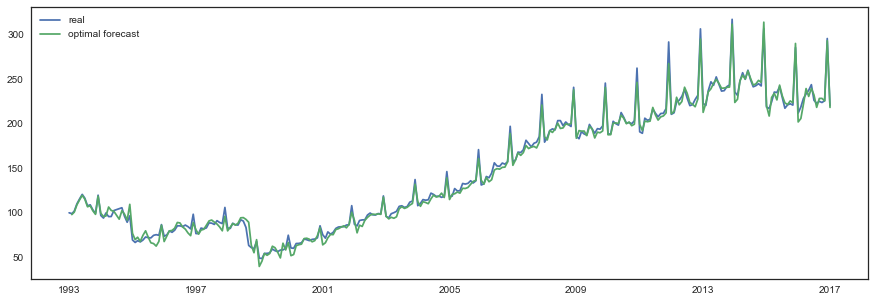

In [33]:
optimal_forecast_ES_At_As = optimal_forecast(ts_wage,optimal_paramaters_ES_At_As)

plt.figure(figsize=(15,5))
plt.plot(ts_wage, label='real')
plt.plot(optimal_forecast_ES_At_As,label='optimal forecast')
plt.legend()

### 4.4 Accuracy of optimal parameters

In [34]:
testing_forecast_ES_At_As = optimal_forecast_ES_At_As['2016-01-01':'2017-01-01']
ix = range(len(testing_forecast_ES_At_As.index))

loss, _ =  qualityMACAPE(testing_ts_wage.iloc[ix], testing_forecast_ES_At_As.iloc[ix])
accuracy = 1 - loss
print('Accuracy =','{:0.2f}%'.format(accuracy.values[0]*100))

Accuracy = 97.67%


### 4.5 Conclusion

We have almost the same accuracy as in Winters model.

<h2 align="left"> 5. Non-additive model of ES (25%)</h2>
You need to realize some ES-model that include non-addive component (or multiplicative trend or multiplicative component) and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize one of following ES models: ESM(A,M) (t.e. Holt-Winters model), ESM(Ad,M), ESM(M,A), ESM(M,M) model.
* 2) Find optimal params of the model (use data from 09.1998 to 01.2015). Note: if you choose damped trend model that $\phi$ you can just set it expetrly (say $0.98$). (Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values of it's params from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2016, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model and Theil-Wage model: is it better than the last one? 
* 5) Is it true that multiplicative model are more unstable than additive? Unstable means thet forecast is can diver

### 5.1 Additive trend + Multiplicative seasonality + dumping

In [513]:
def ES_At_Ms_d (series, h, Params):
    series = np.array(series)
    T = len(series)
    alpha = Params['alpha']
    betta = Params['betta']
    gamma = Params['gamma']
    phi = Params['phi']
    p = Params['seasonality_period']

    FORECAST = [np.NaN]*(T+h)

    if alpha>1 and gamma>1 and betta>1 and phi>1:
        w.warn('Alpha can not be more than 1')
        w.warn('Gamma can not be more than 1')
        w.warn('Betta can not be more than 1')
        w.warn('Phi can not be more than 1')
        return FORECAST

    if alpha<0 and gamma<0 and betta<0 and phi>1:
        w.warn('Alpha can not be less than 0')
        w.warn('Gamma can not be less than 0')
        w.warn('Betta can not be less than 0')
        w.warn('Phi can not be less than 0')
        return FORECAST
    
    # initialization of level, trend and seasonality
    l = np.mean(series[:p])                   # level
    b = np.mean(series[p:2*p] - series[:p])/p # trend
    s = series[:p]/l                          # seasonality
    phi_h = 0
    
    for t in range(T):
        if not math.isnan(series[t]):
            if math.isnan(l):
                l = np.mean(series[t:t+p]) 
            if math.isnan(s[t % p]):
                s[t % p] = series[t] - l 
            old_l = l
            old_b = b
            l = alpha*(series[t]/s[t % p]) + (1-alpha)*(l+phi*b)
            b = betta*(l - old_l) + (1-betta)*phi*b
            s[t % p] = gamma*(series[t]/(old_l + phi*old_b)) + (1-gamma)*s[t % p] 
          
        for j in range(h):
            phi_h = phi_h + phi**j
        phi_h = phi_h*phi
        FORECAST[t+h] = (l + phi_h*b)*s[(t+h) % p]
    return FORECAST


### 5.2 Optimal parameters finding

In [514]:
optimal_paramaters_ES_At_Ms_d, loss_matrix_ES_At_Ms_d = train_plotting(model = ES_At_Ms_d, complexity = 't_s_d',
                                                        parameters = p, train_ts = train_ts_wage,
                                                        loss_function = qualityRMSE,
                                                        plotting_frequency = np.inf)

In [515]:
print_optimal_result(optimal_paramaters_ES_At_Ms_d)

Optimal paramaters for model = ES_At_Ms_d are:
 optimal_alpha = 0.50 
 optimal_betta = 0.07 
 optimal_gamma = 0.43 
 optimal_phi = 0.79 
 optimal_delta = nan 
 optimal_seasonality_period = 12 
 optimal_adaptation_period = nan


['ES_At_Ms_d',
 0.5,
 0.071428571428571425,
 0.42857142857142855,
 0.7857142857142857,
 nan,
 12,
 nan]

### Conclusion: Optimal $\alpha = 0.50, \beta = 0.07, \gamma = 0.43, \phi=0.79$

### 5.3 Plotting optimal forecast and real data:

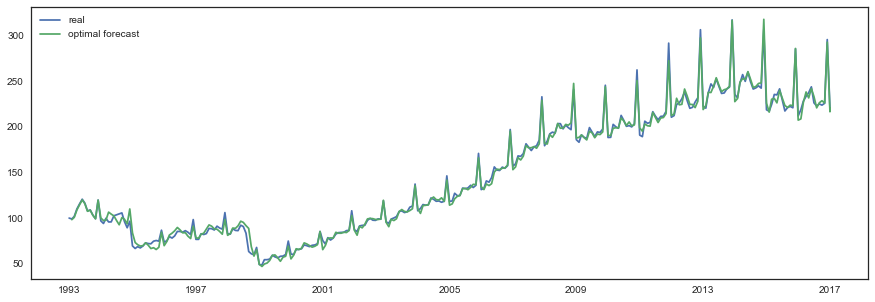

In [516]:
optimal_forecast_ES_At_Ms_d = optimal_forecast(ts_wage,optimal_paramaters_ES_At_Ms_d)

plt.figure(figsize=(15,5))
plt.plot(ts_wage, label='real')
plt.plot(optimal_forecast_ES_At_Ms_d,label='optimal forecast')
plt.legend()

### 5.4 Accuracy of optimal parameters

In [517]:
testing_forecast_ES_At_Ms_d = optimal_forecast_ES_At_Ms_d['2016-01-01':'2017-01-01']
ix = range(len(testing_forecast_ES_At_Ms_d.index))

loss, _ =  qualityMACAPE(testing_ts_wage.iloc[ix], testing_forecast_ES_At_Ms_d.iloc[ix])
accuracy = 1 - loss
print('Accuracy =','{:0.2f}%'.format(accuracy.values[0]*100)) 

Accuracy = 98.29%


#### The best result gives the multiplicative model.

###### Residuals:

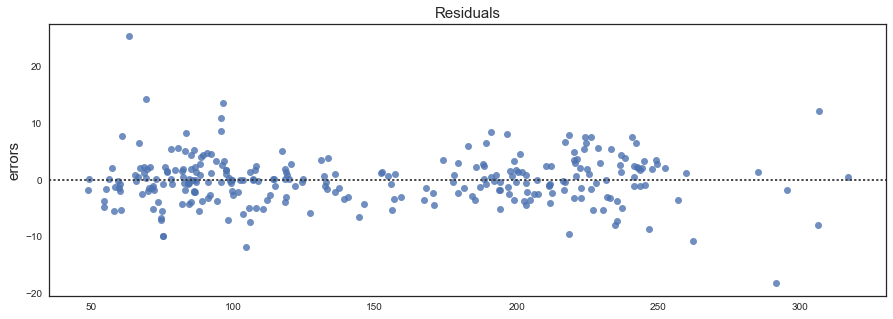

In [518]:
plt.figure(figsize=(15,5))
sns.residplot(ts_wage['1993-09-01': '2017-01-01'],optimal_forecast_ES_At_Ms_d['1993-09-01': '2017-01-01'])
plt.title("Residuals", fontsize=15)
plt.ylabel('errors', fontsize =15)

### 5.5 Stability checking

In [519]:
stability_At_Ms_d_p = {'ALPHA':numbers,'BETTA':[optimal_paramaters_ES_At_Ms_d['betta']],'GAMMA':numbers, 
                       'PHI':[optimal_paramaters_ES_At_Ms_d['phi']], 'DELTA':[optimal_paramaters_ES_At_Ms_d['delta']],  
                       'SEASONALITY_PERIOD':[12],'ADAPTATION_PERIOD':[10],'DELAY':1}

stability_At_As_p = {'ALPHA':numbers,'BETTA':[optimal_paramaters_ES_At_As['betta']],'GAMMA':numbers,
               'PHI':[optimal_paramaters_ES_At_As['phi']], 'DELTA':[optimal_paramaters_ES_At_As['delta']],
                     'SEASONALITY_PERIOD':[12],'ADAPTATION_PERIOD':[10],'DELAY':1}

_, stability_loss_matrix_ES_At_As = train_plotting(model = ES_At_As, complexity = 't_s',
                                                        parameters = stability_At_As_p, train_ts = ts_wage,
                                                        loss_function = qualityRMSE,
                                                        plotting_frequency = np.inf)

_, stability_loss_matrix_ES_At_Ms_d = train_plotting(model = ES_At_Ms_d, complexity = 't_s_d',
                                                        parameters = stability_At_Ms_d_p, train_ts = ts_wage,
                                                        loss_function = qualityRMSE,
                                                        plotting_frequency = np.inf)

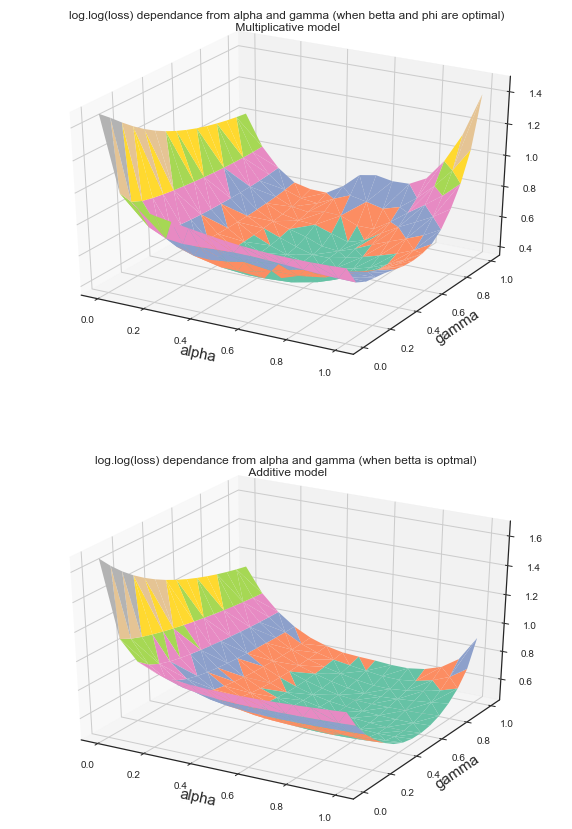

In [520]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(211, projection='3d')
ax.plot_trisurf(stability_loss_matrix_ES_At_Ms_d[:,0],stability_loss_matrix_ES_At_Ms_d[:,2],
                np.log(np.log(stability_loss_matrix_ES_At_Ms_d[:,7])), cmap = 'Set2')
plt.xlabel('alpha',fontsize=15)
plt.ylabel('gamma',fontsize=15)
plt.title('log.log(loss) dependance from alpha and gamma (when betta and phi are optimal)'
         '\n Multiplicative model')

ax = fig.add_subplot(212, projection='3d')
ax.plot_trisurf(stability_loss_matrix_ES_At_As[:,0],stability_loss_matrix_ES_At_As[:,2],
                np.log(np.log(stability_loss_matrix_ES_At_As[:,7])), cmap = 'Set2')
plt.xlabel('alpha',fontsize=15)
plt.ylabel('gamma',fontsize=15)
plt.title('log.log(loss) dependance from alpha and gamma (when betta is optmal)'
         '\n Additive model')

#### from the graph we can easiliy see that multiplicative model is less stable than additive one (this one is much more smoothed)

<h1 align="center">2. Forecasting real TS (50%)</h1>

* I.   Download datasets (see Student ID in sheet 'Notes' <a href="https://drive.google.com/open?id=11-lzxxR0aeBmEDGEW1GiIaP4X3fyCTHxTg4b0wALpzs">here </a>) and put it into pandas Data Frame:
     - for those whose Student ID = 0 mod 3 - <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep36.csv</span> 
     - for those whose Student ID = 1 mod 3 - <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep42.csv</span> 
     - for those whose Student ID = 2 mod 3 - <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep6.csv </span>
     
<a href='https://1drv.ms/f/s!AqGgzb5T4tvShZ1-xS0s6FhP5x-05g'>link to the folder with datasets</a>

Answer questions: are there TS with seaonality in data? which is the seasonality period?
(Hint: you just need to look at aggregate data by each shop).

* II. Define the beginning of the history and the end of the history of TS (for TS_dep36.csv the beginning is 12.05.2005, the end is 13.06.2006)
    
* III. For TS_dep36.csv Find the best ES algorithm (it means ES model + its optimal parameters) for each TS by next sheme:
     
     
     - 0) Use only following ES models: IES (see seminar 2), AES (see seminar 2), Winters with additive seasonality (see Practice Day 1 task 3), Theil-Wage (see Practice Day 1 task 4).
     
     
     - 1) forecasting delay $h = 1$, loss function is MACAPE;
     
     
     - 2) For all models find optimal params of each ES models using first 75% of dates (for TS_dep36.csv from 12.05.2005 to 12.03.2006);
     
     
     - 3) forecast each TS by each ES Model with optimal params using first 90% of dates (for TS_dep36.csv from 12.05.2005 to 30.04.2006);
     - 4) find the optimal ES algorithm: just compare losses of ES models with optimal params calclated for dates that were not used for tuning parameters (for TS_dev36.csv: from 13.03.2006 to 30.04.2006).
    
    You need to remember optimal ES algorithm for each TS!
    
     - 5) Build barchar (histogram) of losses of optimal ES algorithm (were calulated at step before) for all TS (axis x - value of loss, axis y - percentage of TS that have such loss). Here you must exclude those TS which has only NaNs in period under consideration.
            
* IV. Calculate Forecast for each TS by optimal TS algorithm that you find in step 3 for all dates (for TS_dep36.csv from 12.05.2005 to 13.06.2006). 

       
     - 1) Measure accuracy (loss) of forecast for each TS using dates that were not used in step 2)-3) (for TS_dep36.csv from 12.05.2005 to 12.03.2006), here you must exclude those TS which has only NaNs in the end.
    
     - 2) Build barchar (histogram) of losses of optimal ES algorithm for all TS (axis x - value of loss, axis y - percentage of TS that has such loss), here you must exclude those TS which has only NaNs in period under consideration.

     - 3) Are barcharts calculated in step III.4) and in step IV.2) the same? If they differ than say in what manner.

In [36]:
from utils import SES_INIT, SES_ADP

### My dataset is TS_dep6.csv

In [37]:
dep6_ts = pd.read_csv('./data/TS_dep6.csv', sep=';', decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)
dep6_ts.head(5)

item 1089  item 10960  item 1178  item 11827  item 1511  \
Timestamp                                                             
2006-11-01        1.0         2.0        0.0         3.0        3.0   
2006-11-02        2.0         2.0        4.0         0.0        0.0   
2006-11-03        4.0         4.0        1.0         3.0        3.0   
2006-11-04        0.0         3.0        2.0         1.0        1.0   
2006-11-05        4.0         8.0        1.0         2.0        1.0   

            item 15934  item 16368  item 17248  item 18232  item 18291  \
Timestamp                                                                
2006-11-01         0.0         0.0         2.0         3.0         4.0   
2006-11-02         1.0         0.0         5.0         1.0         6.0   
2006-11-03         1.0         0.0         5.0         6.0         7.0   
2006-11-04         0.0         2.0         1.0         1.0         7.0   
2006-11-05         1.0         2.0         6.0         5.0         6.0   

               ...      item 89787  item 91285  item 91845  item 93627  \
Timestamp      ...                                                       
2006-11-01     ...             3.0         NaN         NaN         NaN   
2006-11-02     ...             4.0         NaN         NaN         NaN   
2006-11-03     ...             0.0         NaN         NaN         NaN   
2006-11-04     ...             3.0         NaN         NaN         NaN   
2006-11-05     ...             6.0         NaN         NaN         NaN   

            item 93634  item 96260  item 96880  item 97952  item 99146  \
Timestamp                                                                
2006-11-01         NaN         NaN         NaN         NaN         NaN   
2006-11-02         NaN         NaN         NaN         NaN         NaN   
2006-11-03         NaN         NaN         NaN         NaN         NaN   
2006-11-04         NaN         NaN         NaN         NaN         NaN   
2006-11-05         NaN         NaN         NaN         NaN         NaN   

            item 99147  
Timestamp               
2006-11-01         NaN  
2006-11-02         NaN  
2006-11-03         NaN  
2006-11-04         NaN  
2006-11-05         NaN  

[5 rows x 110 columns]

In [38]:
dep6_ts.columns.size

110

In [39]:
dep6_ts.index.size

334

### History

History start:

In [40]:
dep6_ts.index.min()

Timestamp('2006-11-01 00:00:00')

History end:

In [41]:
dep6_ts.index.max()

Timestamp('2007-09-30 00:00:00')

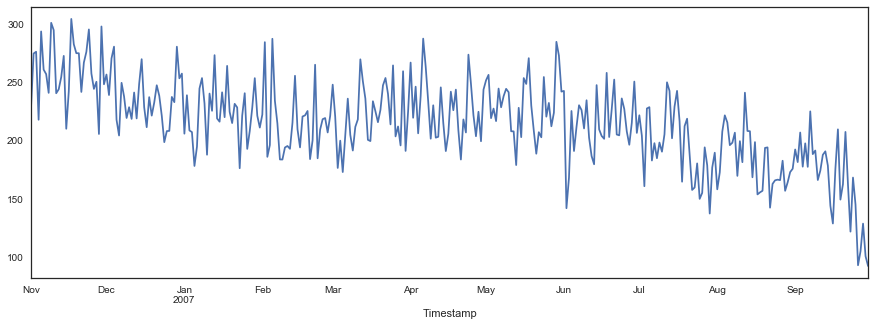

In [42]:
dep6_ts.sum(axis=1).plot(figsize=(15,5))

#### There is a weekly seasonality

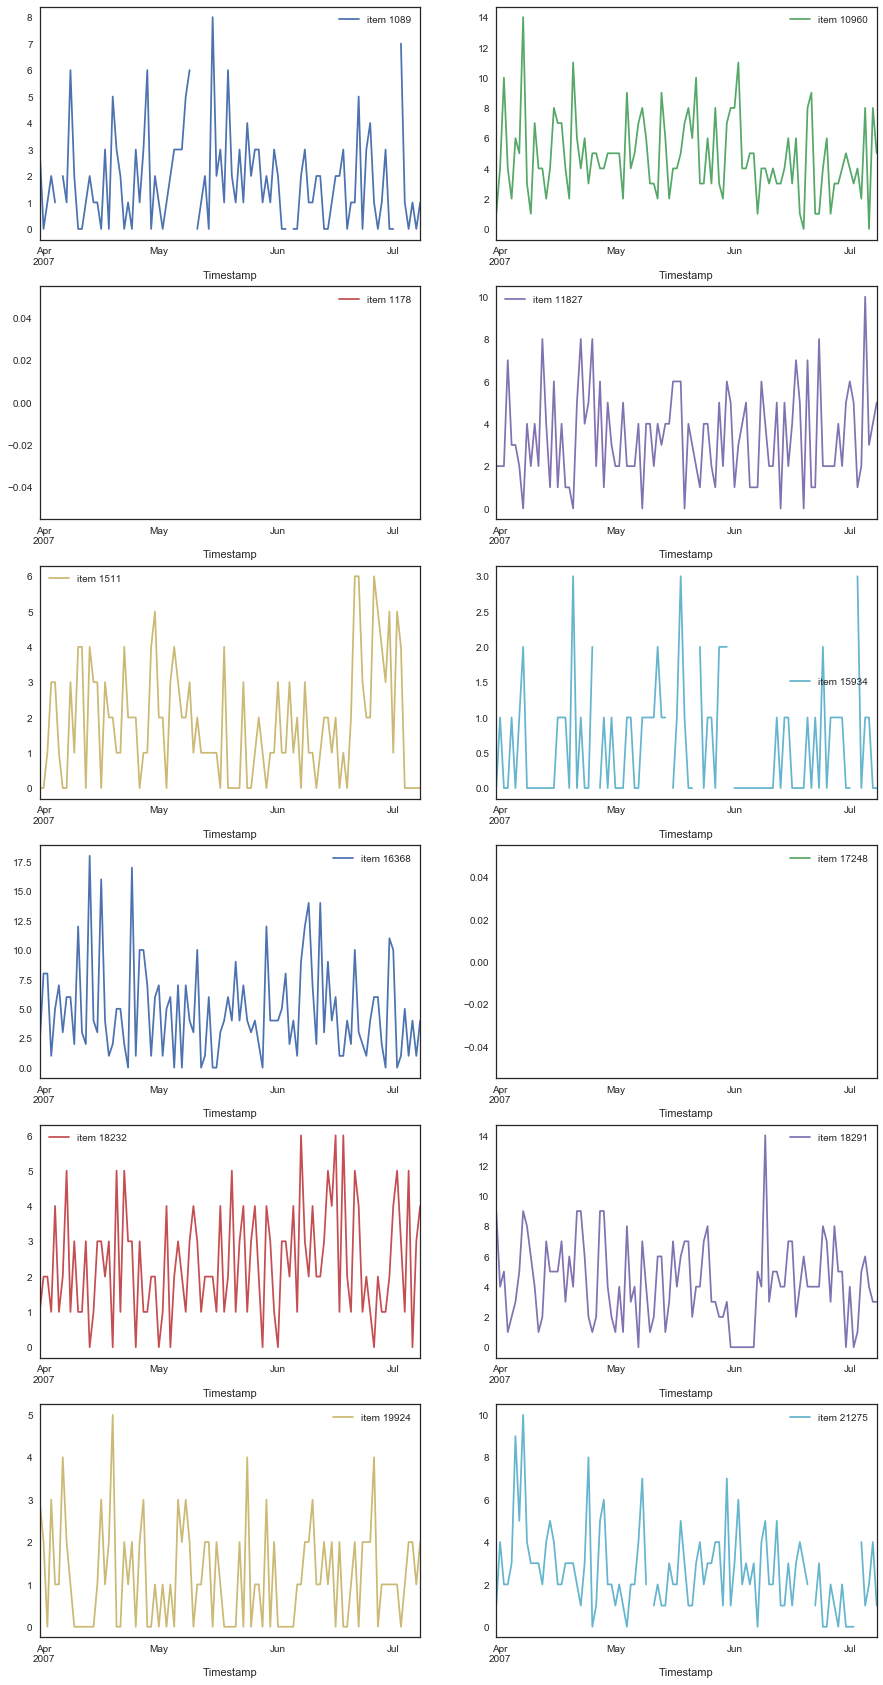

In [43]:
dep6_ts[dep6_ts.columns[:12]].iloc[150:250].plot(subplots = True, layout = (6,2), figsize = (15,30), sharex=False, )
None

### Training

#### Models

In [191]:
models = [SES_INIT, SES_ADP, ES_As, ES_At_As]

#### Grid search parameters

In [192]:
numbers = np.linspace(start=0,stop=1,num=15)
DELTA = [0.0001, 0.001, 0.005, 0.01, 0.03, 0.06, 0.09, 0.1, 0.2, 0.5]

p_dep6 = {'ALPHA':numbers, 'BETTA':numbers, 'GAMMA':numbers, 'PHI':numbers, 'DELTA':DELTA,
     'SEASONALITY_PERIOD':[7],'ADAPTATION_PERIOD':[10,20],'DELAY':1}


#### Data division to train, validation and test

In [147]:
train_point = int(dep6_ts.index.size*0.75)
valid_point = int(dep6_ts.index.size*0.9)

dep6_ts_train = dep6_ts.iloc[:train_point]
dep6_ts_valid = dep6_ts.iloc[:valid_point]

dep6_ts_valid_test = dep6_ts.iloc[train_point:valid_point]
dep6_ts_final_test = dep6_ts.iloc[valid_point:]

In [148]:
# final test data
dep6_ts_final_test

item 1089  item 10960  item 1178  item 11827  item 1511  \
Timestamp                                                             
2007-08-28        0.0         5.0        NaN         7.0        NaN   
2007-08-29        0.0         9.0        NaN         0.0        NaN   
2007-08-30        0.0         1.0        NaN         4.0        NaN   
2007-08-31        2.0         3.0        NaN         0.0        NaN   
2007-09-01        4.0         6.0        NaN         1.0        NaN   
2007-09-02        0.0         4.0        NaN         1.0        NaN   
2007-09-03        1.0         4.0        NaN         2.0        NaN   
2007-09-04        NaN         9.0        NaN         4.0        NaN   
2007-09-05        2.0         4.0        NaN         7.0        NaN   
2007-09-06        1.0         2.0        NaN         3.0        NaN   
2007-09-07        5.0         9.0        NaN         4.0        NaN   
2007-09-08        1.0         4.0        NaN         4.0        NaN   
2007-09-09        1.0         2.0        NaN         5.0        NaN   
2007-09-10        1.0         3.0        NaN         2.0        NaN   
2007-09-11        0.0         9.0        NaN         5.0        NaN   
2007-09-12        2.0         1.0        NaN         5.0        NaN   
2007-09-13        1.0         1.0        NaN         4.0        NaN   
2007-09-14        4.0         0.0        NaN         1.0        NaN   
2007-09-15        1.0         0.0        NaN         2.0        NaN   
2007-09-16        1.0         2.0        NaN         3.0        NaN   
2007-09-17        0.0         2.0        NaN         3.0        NaN   
2007-09-18        3.0         0.0        NaN         6.0        NaN   
2007-09-19        2.0         0.0        NaN         4.0        NaN   
2007-09-20        1.0         7.0        NaN         3.0        NaN   
2007-09-21        2.0         7.0        NaN         5.0        NaN   
2007-09-22        1.0         2.0        NaN         5.0        NaN   
2007-09-23        0.0         NaN        NaN         1.0        NaN   
2007-09-24        2.0         NaN        NaN         5.0        NaN   
2007-09-25        2.0         NaN        NaN         4.0        NaN   
2007-09-26        0.0         NaN        NaN         5.0        NaN   
2007-09-27        0.0         NaN        NaN         5.0        NaN   
2007-09-28        2.0         NaN        NaN         5.0        NaN   
2007-09-29        2.0         NaN        NaN         2.0        NaN   
2007-09-30        2.0         NaN        NaN         9.0        NaN   

            item 15934  item 16368  item 17248  item 18232  item 18291  \
Timestamp                                                                
2007-08-28         0.0         2.0         NaN         3.0         6.0   
2007-08-29         0.0         1.0         NaN         0.0         8.0   
2007-08-30         0.0         5.0         NaN         4.0         5.0   
2007-08-31         2.0         2.0         NaN         0.0        10.0   
2007-09-01         1.0         6.0         NaN         2.0         4.0   
2007-09-02         0.0        13.0         NaN         1.0         5.0   
2007-09-03         1.0         8.0         NaN         4.0         3.0   
2007-09-04         2.0         1.0         NaN         1.0         3.0   
2007-09-05         2.0         4.0         NaN         5.0         5.0   
2007-09-06         3.0         0.0         NaN         4.0         9.0   
2007-09-07         3.0         1.0         NaN         2.0         6.0   
2007-09-08         1.0         2.0         NaN         4.0         5.0   
2007-09-09         1.0         6.0         NaN         6.0         3.0   
2007-09-10         2.0         1.0         NaN         1.0         6.0   
2007-09-11         1.0         0.0         NaN         4.0         2.0   
2007-09-12         3.0         7.0         NaN         5.0         1.0   
2007-09-13         1.0         4.0         NaN         5.0         2.0   
2007-09-14         7.0         6.0         NaN   

#### Finding optimal parameters for all models for all columns in train data

In [149]:
def create_opt_DF(model, complexity, parameters, train_ts, loss_function, plotting_frequency):
    
    optimal_list = []
    
    for column in train_ts.columns:
        new_train_ts = pd.DataFrame(train_ts[column])
        optimal_result, _ = train_plotting(model, complexity, parameters, new_train_ts, loss_function, plotting_frequency)
        optimal_list.append(optimal_result)
    
    optimal_dataframe = pd.DataFrame(index = optimal_list[0].keys(),columns = train_ts.columns)
    for i , data in enumerate(optimal_list):
        optimal_dataframe.iloc[:,i] = data.values()
        optimal_dataframe.iloc[0,i] = data['model'].__name__
    
    return optimal_dataframe

In [174]:
SES_INIT_DF = create_opt_DF(model = SES_INIT, complexity = '_', parameters = p_dep6, train_ts = dep6_ts_train,
                loss_function = qualityRMSE, plotting_frequency = np.inf)

In [175]:
SES_ADP_DF = create_opt_DF(model = SES_ADP, complexity = 'a', parameters = p_dep6, train_ts = dep6_ts_train,
                loss_function = qualityRMSE, plotting_frequency = np.inf)

In [176]:
ES_As_DF = create_opt_DF(model = ES_As, complexity = 's', parameters = p_dep6, train_ts = dep6_ts_train,
                loss_function = qualityRMSE, plotting_frequency = np.inf)

In [182]:
ES_At_As_DF = create_opt_DF(model = ES_At_As, complexity = 't_s', parameters = p_dep6, train_ts = dep6_ts_train,
                loss_function = qualityRMSE, plotting_frequency = np.inf)

In [186]:
SES_INIT_DF.iloc[:,:13]

item 1089 item 10960  item 1178 item 11827 item 1511  \
model                SES_INIT   SES_INIT   SES_INIT   SES_INIT  SES_INIT   
delay                       1          1          1          1         1   
alpha               0.0714286  0.0714286  0.0714286  0.0714286  0.142857   
betta                     NaN        NaN        NaN        NaN       NaN   
gamma                     NaN        NaN        NaN        NaN       NaN   
phi                       NaN        NaN        NaN        NaN       NaN   
delta                     NaN        NaN        NaN        NaN       NaN   
loss                  2.02946    2.17743    1.63852    2.14214   1.54978   
seasonality_period        NaN        NaN        NaN        NaN       NaN   
adaptation_period          10         20         10         10        20   

                   item 15934 item 16368 item 17248 item 18232 item 18291  \
model                SES_INIT   SES_INIT   SES_INIT   SES_INIT   SES_INIT   
delay                       1          1          1          1          1   
alpha                       0  0.0714286   0.142857  0.0714286   0.142857   
betta                     NaN        NaN        NaN        NaN        NaN   
gamma                     NaN        NaN        NaN        NaN        NaN   
phi                       NaN        NaN        NaN        NaN        NaN   
delta                     NaN        NaN        NaN        NaN        NaN   
loss                 0.845895    4.35207    2.28407    1.52626    2.71643   
seasonality_period        NaN        NaN        NaN        NaN        NaN   
adaptation_period          10         10         10         10         10   

                   item 19924 item 21275 item 21496  
model                SES_INIT   SES_INIT   SES_INIT  
delay                       1          1          1  
alpha               0.0714286          0   0.142857  
betta                     NaN        NaN        NaN  
gamma                     NaN        NaN        NaN  
phi                       NaN        NaN        NaN  
delta                     NaN        NaN        NaN  
loss                  1.16667    1.98711   0.328883  
seasonality_period        NaN        NaN        NaN  
adaptation_period          20         10         10

In [187]:
SES_ADP_DF.iloc[:,:13]

item 1089 item 10960 item 1178 item 11827 item 1511  \
model                 SES_ADP    SES_ADP   SES_ADP    SES_ADP   SES_ADP   
delay                       1          1         1          1         1   
alpha               0.0714286  0.0714286         0          0  0.571429   
betta                     NaN        NaN       NaN        NaN       NaN   
gamma                     NaN        NaN       NaN        NaN       NaN   
phi                       NaN        NaN       NaN        NaN       NaN   
delta                  0.0001     0.0001      0.06      0.001      0.06   
loss                  2.02951    2.17799   1.61791    2.13905   1.54758   
seasonality_period        NaN        NaN       NaN        NaN       NaN   
adaptation_period          10         20        10         20        20   

                   item 15934 item 16368 item 17248 item 18232 item 18291  \
model                 SES_ADP    SES_ADP    SES_ADP    SES_ADP    SES_ADP   
delay                       1          1          1          1          1   
alpha                       0  0.0714286          0          0   0.285714   
betta                     NaN        NaN        NaN        NaN        NaN   
gamma                     NaN        NaN        NaN        NaN        NaN   
phi                       NaN        NaN        NaN        NaN        NaN   
delta                    0.01      0.001       0.06      0.005       0.09   
loss                 0.836871    4.35052     2.1834    1.52458    2.66106   
seasonality_period        NaN        NaN        NaN        NaN        NaN   
adaptation_period          10         10         10         10         10   

                   item 19924 item 21275 item 21496  
model                 SES_ADP    SES_ADP    SES_ADP  
delay                       1          1          1  
alpha                       0          0          0  
betta                     NaN        NaN        NaN  
gamma                     NaN        NaN        NaN  
phi                       NaN        NaN        NaN  
delta                    0.03      0.005       0.06  
loss                  1.15614    1.98733   0.324883  
seasonality_period        NaN        NaN        NaN  
adaptation_period          20         10         10

In [188]:
ES_As_DF.iloc[:,:13]

item 1089 item 10960 item 1178 item 11827  item 1511  \
model                  ES_As      ES_As     ES_As      ES_As      ES_As   
delay                      1          1         1          1          1   
alpha                      0  0.0714286         0  0.0714286  0.0714286   
betta                    NaN        NaN       NaN        NaN        NaN   
gamma               0.214286   0.142857  0.214286  0.0714286   0.142857   
phi                      NaN        NaN       NaN        NaN        NaN   
delta                    NaN        NaN       NaN        NaN        NaN   
loss                 2.01998    2.32346   1.75887    2.18802     1.6232   
seasonality_period         7          7         7          7          7   
adaptation_period        NaN        NaN       NaN        NaN        NaN   

                   item 15934 item 16368 item 17248 item 18232 item 18291  \
model                   ES_As      ES_As      ES_As      ES_As      ES_As   
delay                       1          1          1          1          1   
alpha                       0  0.0714286  0.0714286  0.0714286   0.142857   
betta                     NaN        NaN        NaN        NaN        NaN   
gamma                0.142857          0   0.357143   0.214286   0.142857   
phi                       NaN        NaN        NaN        NaN        NaN   
delta                     NaN        NaN        NaN        NaN        NaN   
loss                 0.864865    4.37633    2.67963    1.62771    2.76538   
seasonality_period          7          7          7          7          7   
adaptation_period         NaN        NaN        NaN        NaN        NaN   

                   item 19924 item 21275 item 21496  
model                   ES_As      ES_As      ES_As  
delay                       1          1          1  
alpha               0.0714286          0  0.0714286  
betta                     NaN        NaN        NaN  
gamma                0.142857   0.142857   0.142857  
phi                       NaN        NaN        NaN  
delta                     NaN        NaN        NaN  
loss                   1.2182    2.04049   0.343954  
seasonality_period          7          7          7  
adaptation_period         NaN        NaN        NaN

In [189]:
ES_At_As_DF.iloc[:,:13]

item 1089 item 10960  item 1178 item 11827  item 1511  \
model                ES_At_As   ES_At_As   ES_At_As   ES_At_As   ES_At_As   
delay                       1          1          1          1          1   
alpha               0.0714286  0.0714286  0.0714286  0.0714286   0.214286   
betta               0.0714286   0.214286          0   0.142857  0.0714286   
gamma                0.214286   0.142857   0.214286  0.0714286   0.142857   
phi                       NaN        NaN        NaN        NaN        NaN   
delta                     NaN        NaN        NaN        NaN        NaN   
loss                  2.07724    2.37835    1.79204    2.25655    1.67949   
seasonality_period          7          7          7          7          7   
adaptation_period         NaN        NaN        NaN        NaN        NaN   

                   item 15934 item 16368 item 17248 item 18232 item 18291  \
model                ES_At_As   ES_At_As   ES_At_As   ES_At_As   ES_At_As   
delay                       1          1          1          1          1   
alpha                       0   0.142857          0  0.0714286   0.142857   
betta                       0  0.0714286          0          0  0.0714286   
gamma                       0          0   0.357143   0.214286   0.142857   
phi                       NaN        NaN        NaN        NaN        NaN   
delta                     NaN        NaN        NaN        NaN        NaN   
loss                      NaN    4.52331    2.53426    1.63808    2.82723   
seasonality_period          7          7          7          7          7   
adaptation_period         NaN        NaN        NaN        NaN        NaN   

                   item 19924 item 21275 item 21496  
model                ES_At_As   ES_At_As   ES_At_As  
delay                       1          1          1  
alpha               0.0714286  0.0714286          0  
betta               0.0714286  0.0714286          0  
gamma                0.142857   0.142857          0  
phi                       NaN        NaN        NaN  
delta                     NaN        NaN        NaN  
loss                  1.24003    2.11948        NaN  
seasonality_period          7          7          7  
adaptation_period         NaN        NaN        NaN

#### Forecasting for validation data for each model

In [217]:
def forecast(data_ts, model_dataframe):
    
    model_dict = model_dataframe.to_dict()
    forecast_dataframe = empty_frc(data_ts,p_dep6['DELAY'])
    
    for column in forecast_dataframe.columns:        
        
        model = model_dict[column]['model']
        delay = model_dict[column]['delay']
        
        forecast_dataframe[column] = eval(model)(data_ts[column], delay, model_dict[column])
       
    return forecast_dataframe

##### The list of optimal dataframes

In [223]:
optimal_DFs = [SES_INIT_DF, SES_ADP_DF, ES_As_DF, ES_At_As_DF]

In [387]:
valid_frc_tests = []

for DF in optimal_DFs:        
    valid_frc_tests.append(forecast(dep6_ts_valid, DF).iloc[train_point:valid_point])

#### Best algorithms finding for validation data (RMSE and MACAPE)

In [399]:
optimal_alg_DF_RMSE = pd.DataFrame(index = ['best','loss'], columns = dep6_ts.columns)

for column in optimal_alg_DF_RMSE.columns:
    loss = np.inf
    
    for i, DF in enumerate(optimal_DFs):
        new_loss,_ = qualityRMSE(dep6_ts_valid_test[column], valid_frc_tests[i][column])
        
        if new_loss <= loss:
            optimal_alg_DF_RMSE[column]['best'] = i
            optimal_alg_DF_RMSE[column]['loss'] = new_loss
            loss = new_loss

In [400]:
optimal_alg_DF_RMSE

item 1089 item 10960 item 1178 item 11827 item 1511 item 15934  \
best         1          1       NaN          1         2          1   
loss    1.0008      2.083       NaN    2.33293   1.33047    1.12464   

     item 16368 item 17248 item 18232 item 18291    ...     item 89787  \
best          1        NaN          0          1    ...            NaN   
loss    4.64581        NaN    2.34844    2.57359    ...            NaN   

     item 91285 item 91845 item 93627 item 93634 item 96260 item 96880  \
best        NaN        NaN        NaN        NaN        NaN        NaN   
loss        NaN        NaN        NaN        NaN        NaN        NaN   

     item 97952 item 99146 item 99147  
best        NaN        NaN        NaN  
loss        NaN        NaN        NaN  

[2 rows x 110 columns]

In [402]:
optimal_alg_DF_MACAPE = pd.DataFrame(index = ['best','loss'], columns = dep6_ts.columns)

for column in optimal_alg_DF_MACAPE.columns:
    loss = np.inf
    
    for i, DF in enumerate(optimal_DFs):
        new_loss,_ = qualityMACAPE(dep6_ts_valid_test[column], valid_frc_tests[i][column])
        
        if new_loss <= loss:
            optimal_alg_DF_MACAPE[column]['best'] = i
            optimal_alg_DF_MACAPE[column]['loss'] = new_loss
            loss = new_loss

In [403]:
optimal_alg_DF_MACAPE

item 1089 item 10960 item 1178 item 11827 item 1511 item 15934  \
best         1          2       NaN          1         2          0   
loss  0.797105   0.687759       NaN   0.497037  0.556273    1.26127   

     item 16368 item 17248 item 18232 item 18291    ...     item 89787  \
best          1        NaN          0          1    ...            NaN   
loss   0.811658        NaN   0.703856    0.51865    ...            NaN   

     item 91285 item 91845 item 93627 item 93634 item 96260 item 96880  \
best        NaN        NaN        NaN        NaN        NaN        NaN   
loss        NaN        NaN        NaN        NaN        NaN        NaN   

     item 97952 item 99146 item 99147  
best        NaN        NaN        NaN  
loss        NaN        NaN        NaN  

[2 rows x 110 columns]

#### Loss histograms for validation

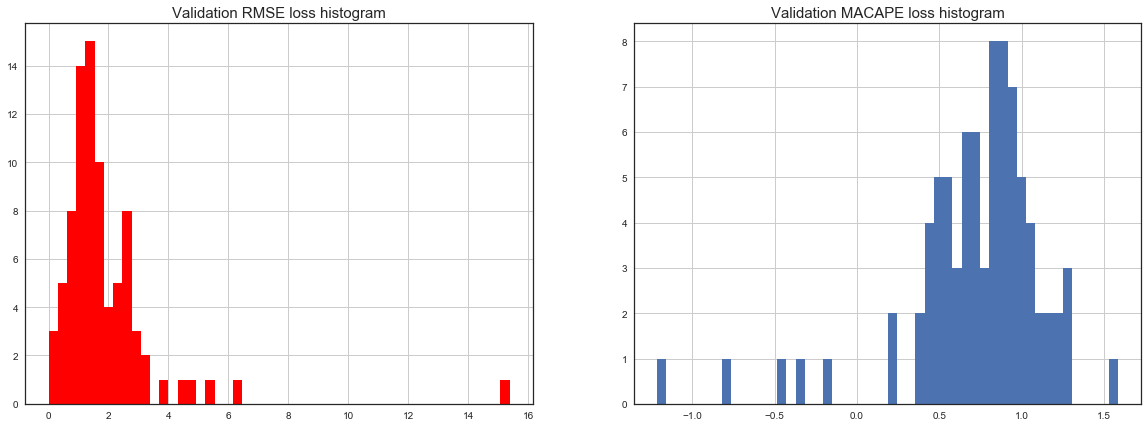

In [425]:
RMSE_valid_loss = pd.Series(optimal_alg_DF_RMSE.loc['loss']).dropna()
MACAPE_valid_loss = pd.Series(optimal_alg_DF_MACAPE.loc['loss']).dropna()

fig = plt.figure(figsize=(20,7))

ax1 = fig.add_subplot(121)
ax1.set_title('Validation RMSE loss histogram', fontsize=15)
RMSE_valid_loss.hist(bins=50, ax=ax1, color ='r')

ax2 = fig.add_subplot(122)
ax2.set_title('Validation MACAPE loss histogram', fontsize=15)
MACAPE_valid_loss.hist(bins=50, ax=ax2)

### Final testing

#### Defining forecast using best algorithm for whole data

In [429]:
forecast_RMSE = empty_frc(dep6_ts,p_dep6['DELAY'])
forecast_MACAPE = empty_frc(dep6_ts,p_dep6['DELAY'])

In [437]:
for column in forecast_RMSE.columns:
    data = pd.DataFrame(dep6_ts[column])
    
    if np.isnan(optimal_alg_DF_RMSE[column]['best']):
        forecast_RMSE[column] = forecast(data,optimal_DFs[2])       
    else:
        forecast_RMSE[column] = forecast(data,optimal_DFs[optimal_alg_DF_RMSE[column]['best']])

In [440]:
forecast_RMSE.tail()

item 1089  item 10960  item 1178  item 11827  item 1511  \
2007-09-27   1.350484    3.134586   2.314548    3.742683   1.492152   
2007-09-28   1.257478    3.134586   2.746593    3.760278   2.219490   
2007-09-29   1.308509    3.134586   1.460618    3.776310   1.457029   
2007-09-30   1.356080    3.134586   2.184428    3.755198   1.295909   
2007-10-01   1.400419    3.134586   1.768464    3.825201   1.851237   

            item 15934  item 16368  item 17248  item 18232  item 18291  \
2007-09-27    1.652351    4.158722    1.810827    2.666512    3.290818   
2007-09-28    1.973611    4.100083    2.110175    2.833189    2.414290   
2007-09-29    1.818401    4.244698    1.545632    2.845104    1.540649   
2007-09-30    1.845069    4.232086    1.871253    2.999026    1.312238   
2007-10-01    1.868090    4.117396    0.824053    2.784809    4.225870   

               ...      item 89787  item 91285  item 91845  item 93627  \
2007-09-27     ...        0.301912         NaN         NaN         NaN   
2007-09-28     ...        0.577422         NaN         NaN         NaN   
2007-09-29     ...        0.145337         NaN         NaN         NaN   
2007-09-30     ...        0.882883         NaN         NaN         NaN   
2007-10-01     ...        0.223122         NaN         NaN         NaN   

            item 93634  item 96260  item 96880  item 97952  item 99146  \
2007-09-27         NaN         NaN         NaN         NaN         NaN   
2007-09-28         NaN         NaN         NaN         NaN         NaN   
2007-09-29         NaN         NaN         NaN         NaN         NaN   
2007-09-30         NaN         NaN         NaN         NaN         NaN   
2007-10-01         NaN         NaN         NaN         NaN         NaN   

            item 99147  
2007-09-27         NaN  
2007-09-28         NaN  
2007-09-29         NaN  
2007-09-30         NaN  
2007-10-01         NaN  

[5 rows x 110 columns]

In [442]:
for column in forecast_MACAPE.columns:
    data = pd.DataFrame(dep6_ts[column])
    
    if np.isnan(optimal_alg_DF_MACAPE[column]['best']):
        forecast_MACAPE[column] = forecast(data,optimal_DFs[2])       
    else:
        forecast_MACAPE[column] = forecast(data,optimal_DFs[optimal_alg_DF_MACAPE[column]['best']])

In [443]:
forecast_MACAPE.tail()

item 1089  item 10960  item 1178  item 11827  item 1511  \
2007-09-27   1.350484    3.171337   2.314548    3.742683   1.492152   
2007-09-28   1.257478    3.633259   2.746593    3.760278   2.219490   
2007-09-29   1.308509    2.557426   1.460618    3.776310   1.457029   
2007-09-30   1.356080    3.242717   2.184428    3.755198   1.295909   
2007-10-01   1.400419    2.739078   1.768464    3.825201   1.851237   

            item 15934  item 16368  item 17248  item 18232  item 18291  \
2007-09-27    0.764064    4.158722    1.810827    2.666512    3.290818   
2007-09-28    0.764064    4.100083    2.110175    2.833189    2.414290   
2007-09-29    0.764064    4.244698    1.545632    2.845104    1.540649   
2007-09-30    0.764064    4.232086    1.871253    2.999026    1.312238   
2007-10-01    0.764064    4.117396    0.824053    2.784809    4.225870   

               ...      item 89787  item 91285  item 91845  item 93627  \
2007-09-27     ...        0.301912         NaN         NaN         NaN   
2007-09-28     ...        0.577422         NaN         NaN         NaN   
2007-09-29     ...        0.145337         NaN         NaN         NaN   
2007-09-30     ...        0.882883         NaN         NaN         NaN   
2007-10-01     ...        0.223122         NaN         NaN         NaN   

            item 93634  item 96260  item 96880  item 97952  item 99146  \
2007-09-27         NaN         NaN         NaN         NaN         NaN   
2007-09-28         NaN         NaN         NaN         NaN         NaN   
2007-09-29         NaN         NaN         NaN         NaN         NaN   
2007-09-30         NaN         NaN         NaN         NaN         NaN   
2007-10-01         NaN         NaN         NaN         NaN         NaN   

            item 99147  
2007-09-27         NaN  
2007-09-28         NaN  
2007-09-29         NaN  
2007-09-30         NaN  
2007-10-01         NaN  

[5 rows x 110 columns]

#### Loss calculation for final test data

In [485]:
RMSE_test_loss_DF = pd.DataFrame(index=['loss'], columns=dep6_ts_final_test.columns)
MACAPE_test_loss_DF = pd.DataFrame(index=['loss'], columns=dep6_ts_final_test.columns)
RMSE_all_loss_DF = pd.DataFrame(index=['loss'], columns=dep6_ts.columns)
MACAPE_all_loss_DF = pd.DataFrame(index=['loss'], columns=dep6_ts.columns)

In [486]:
for column in RMSE_test_loss_DF.columns:
    loss,_ = qualityRMSE(dep6_ts_final_test[column],forecast_RMSE[valid_point:valid_point+len(dep6_ts_final_test)][column])
    RMSE_test_loss_DF[column] = loss
    
for column in MACAPE_test_loss_DF.columns:
    loss,_ = qualityMACAPE(dep6_ts_final_test[column],forecast_MACAPE[valid_point:valid_point+len(dep6_ts_final_test)][column])
    MACAPE_test_loss_DF[column] = loss
    
for column in RMSE_all_loss_DF.columns:
    loss,_ = qualityRMSE(dep6_ts[column],forecast_RMSE[:valid_point+len(dep6_ts_final_test)][column])
    RMSE_all_loss_DF[column] = loss
    
for column in MACAPE_all_loss_DF.columns:
    loss,_ = qualityMACAPE(dep6_ts[column],forecast_MACAPE[:valid_point+len(dep6_ts_final_test)][column])
    MACAPE_all_loss_DF[column] = loss    

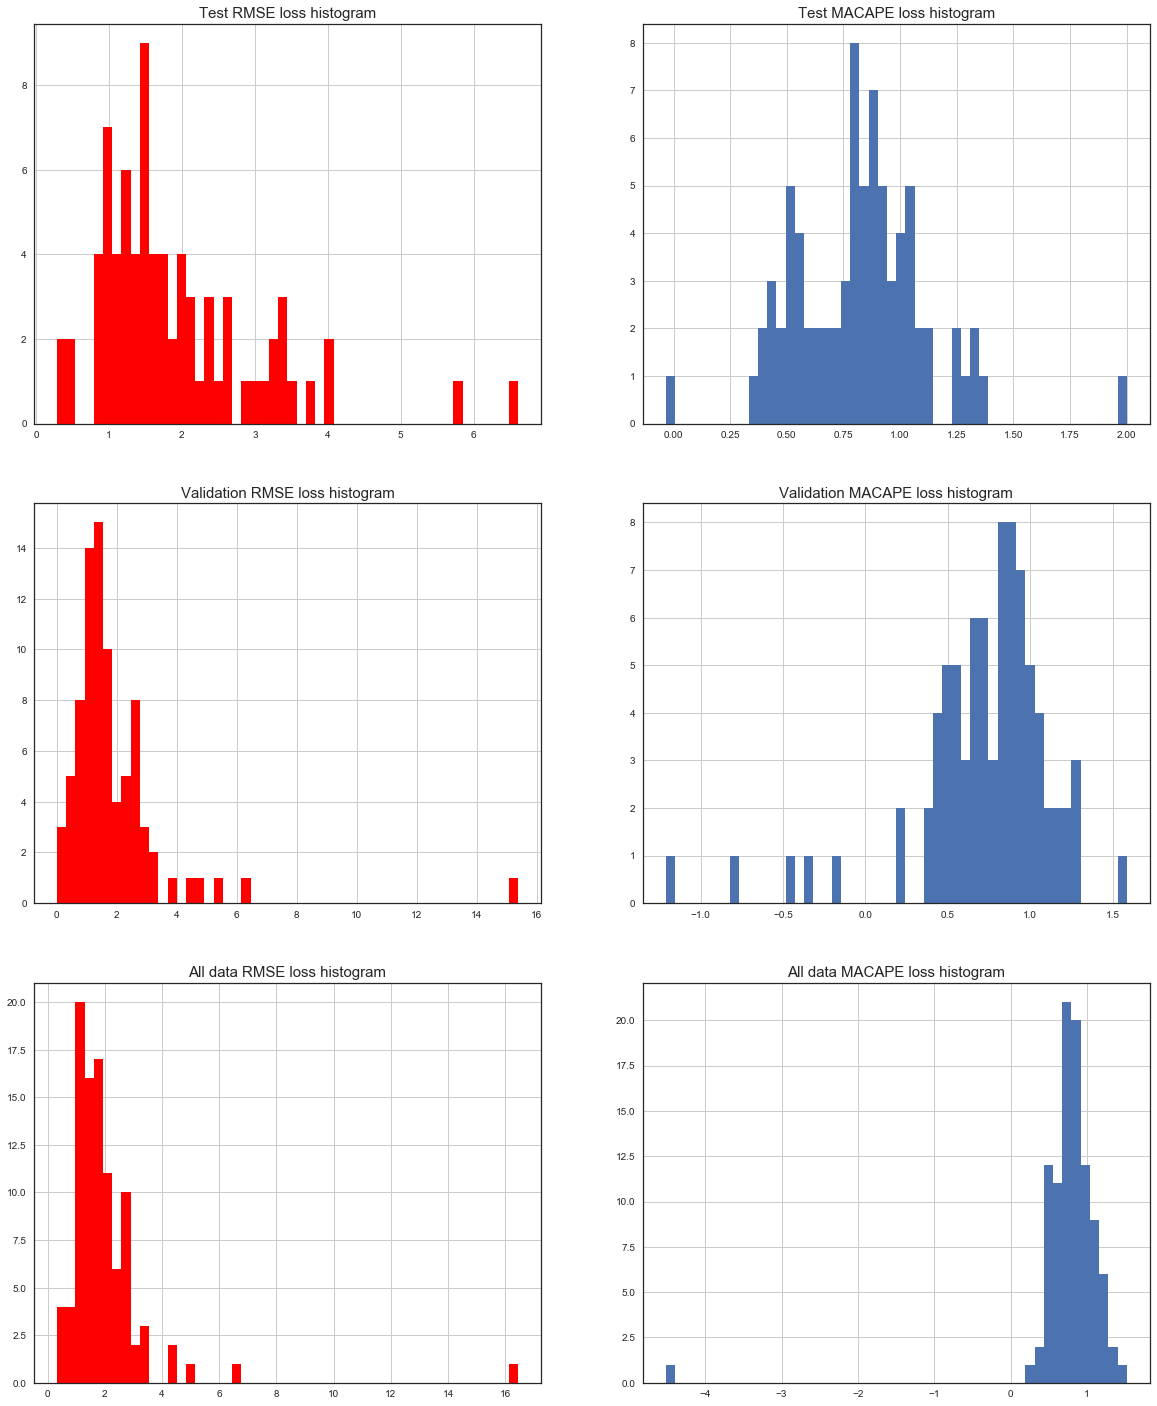

In [522]:
RMSE_test_loss = pd.Series(RMSE_test_loss_DF.loc['loss']).dropna()
MACAPE_test_loss = pd.Series(MACAPE_test_loss_DF.loc['loss']).dropna()
RMSE_all_loss = pd.Series(RMSE_all_loss_DF.loc['loss']).dropna()
MACAPE_all_loss = pd.Series(MACAPE_all_loss_DF.loc['loss']).dropna()


fig = plt.figure(figsize=(20,25))

ax1 = fig.add_subplot(321)
ax1.set_title('Test RMSE loss histogram', fontsize=15)
RMSE_test_loss.hist(bins=50, ax=ax1, color ='r')

ax2 = fig.add_subplot(322)
ax2.set_title('Test MACAPE loss histogram', fontsize=15)
MACAPE_test_loss.hist(bins=50, ax=ax2)

ax3 = fig.add_subplot(323)
ax3.set_title('Validation RMSE loss histogram', fontsize=15)
RMSE_valid_loss.hist(bins=50, ax=ax3, color ='r')

ax4 = fig.add_subplot(324)
ax4.set_title('Validation MACAPE loss histogram', fontsize=15)
MACAPE_valid_loss.hist(bins=50, ax=ax4)

ax5 = fig.add_subplot(325)
ax5.set_title('All data RMSE loss histogram', fontsize=15)
RMSE_all_loss.hist(bins=50, ax=ax5, color ='r')

ax6 = fig.add_subplot(326)
ax6.set_title('All data MACAPE loss histogram', fontsize=15)
MACAPE_all_loss.hist(bins=50, ax=ax6)
None

###### Histograms are moved to the right for RMSE loss and there are loss values, which now have more distribution.